# Agrupamiento de docentes en base a su desempeño académico 

En este proyecto se realiza el análisis de los datos de evaluación docente mediante técnicas de clusterización para identificar perfiles de desempeño que permitan proponer acciones de mejora orientadas al desarrollo profesional y la mejora continua de la calidad educativa en las IES

### Librerías para análisis de datos

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Recopilación y limpieza de datos

### Dataset que contiene los resultados de heteroevaluación 

In [231]:
df_hetero = pd.read_excel("Datos/heteroevaluacion_anonimizado.xlsx")

In [232]:
df_heteroevaluacion = df_hetero
df_heteroevaluacion.head()

,unidad_academica,dedicacion,modalidad,NRC,id_curso,curso,seccion,nivel,codigo_horario,horas_distributivo,...,porcentaje_de_respuestas,estado_encuesta,descripcion_estado_encuesta,area_pregunta,codigo_pregunta,promedio_puntaje_pregunta,maximo_puntaje_pregunta,maximo_puntaje_encuesta,promedio_puntaje_encuesta,docente_id_anon
0,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1967,DERE-00050,Medicinal legal,G1,Nivel 6,CDE,4,...,88.89,A,Activo,AMB1,HE01,4.47,5,5,4.45,3ff4fa200f
1,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1969,DERE-00050,Medicinal legal,G2,Nivel 6,CDE,4,...,97.14,A,Activo,AMB1,HE01,4.79,5,5,4.75,3ff4fa200f
2,Facultad de Jurisprudencia y Ciencias Política...,Por horas,No titular,3406,FJUR-00165,Derecho administrativo III,G1,Nivel 6,CDE,2,...,75.00,A,Activo,AMB1,HE01,4.22,5,5,4.55,3f21684cb8
3,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4433,SALU-00232,Infectologia,G2,Nivel 7,ACD,3,...,75.00,A,Activo,AMB1,HE01,4.70,5,5,4.78,f19c322bde
4,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4435,SALU-00232,Infectologia,S9,Nivel 7,APE,1,...,75.00,A,Activo,AMB1,HE01,4.00,5,5,4.53,f19c322bde


**Descripción del conjunto de datos**

In [233]:
df_heteroevaluacion.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70329 entries, 0 to 70328
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   unidad_academica             70329 non-null  object 
 1   dedicacion                   70329 non-null  object 
 2   modalidad                    69853 non-null  object 
 3   NRC                          70329 non-null  int64  
 4   id_curso                     70329 non-null  object 
 5   curso                        70329 non-null  object 
 6   seccion                      70329 non-null  object 
 7   nivel                        70329 non-null  object 
 8   codigo_horario               70329 non-null  object 
 9   horas_distributivo           70329 non-null  int64  
 10  numero_alumnos               70329 non-null  int64  
 11  total_de_respuestas          70329 non-null  int64  
 12  porcentaje_de_respuestas     70329 non-null  float64
 13  estado_encuesta 

In [234]:
df_heteroevaluacion.describe()

,NRC,horas_distributivo,numero_alumnos,total_de_respuestas,porcentaje_de_respuestas,promedio_puntaje_pregunta,maximo_puntaje_pregunta,maximo_puntaje_encuesta,promedio_puntaje_encuesta
count,70329.000000,70329.000000,70329.000000,70329.000000,70329.000000,70329.000000,70329.000000,70329.0,70329.000000
mean,3271.998550,2.970027,20.869229,18.047136,86.497820,4.392536,4.823529,5.0,4.594868
std,1356.715298,1.957273,12.695803,11.428494,14.158546,0.670580,0.512815,0.0,0.374756
min,1001.000000,0.000000,1.000000,1.000000,16.670000,1.000000,3.000000,5.0,2.290000
25%,2087.000000,1.000000,10.000000,8.000000,80.000000,4.200000,5.000000,5.0,4.440000
50%,3195.000000,3.000000,21.000000,17.000000,90.000000,4.630000,5.000000,5.0,4.680000
75%,4436.000000,4.000000,30.000000,27.000000,97.730000,4.860000,5.000000,5.0,4.860000
max,5723.000000,11.000000,66.000000,64.000000,200.000000,5.000000,5.000000,5.0,5.000000


**Análisis de valores faltantes**

<Axes: >

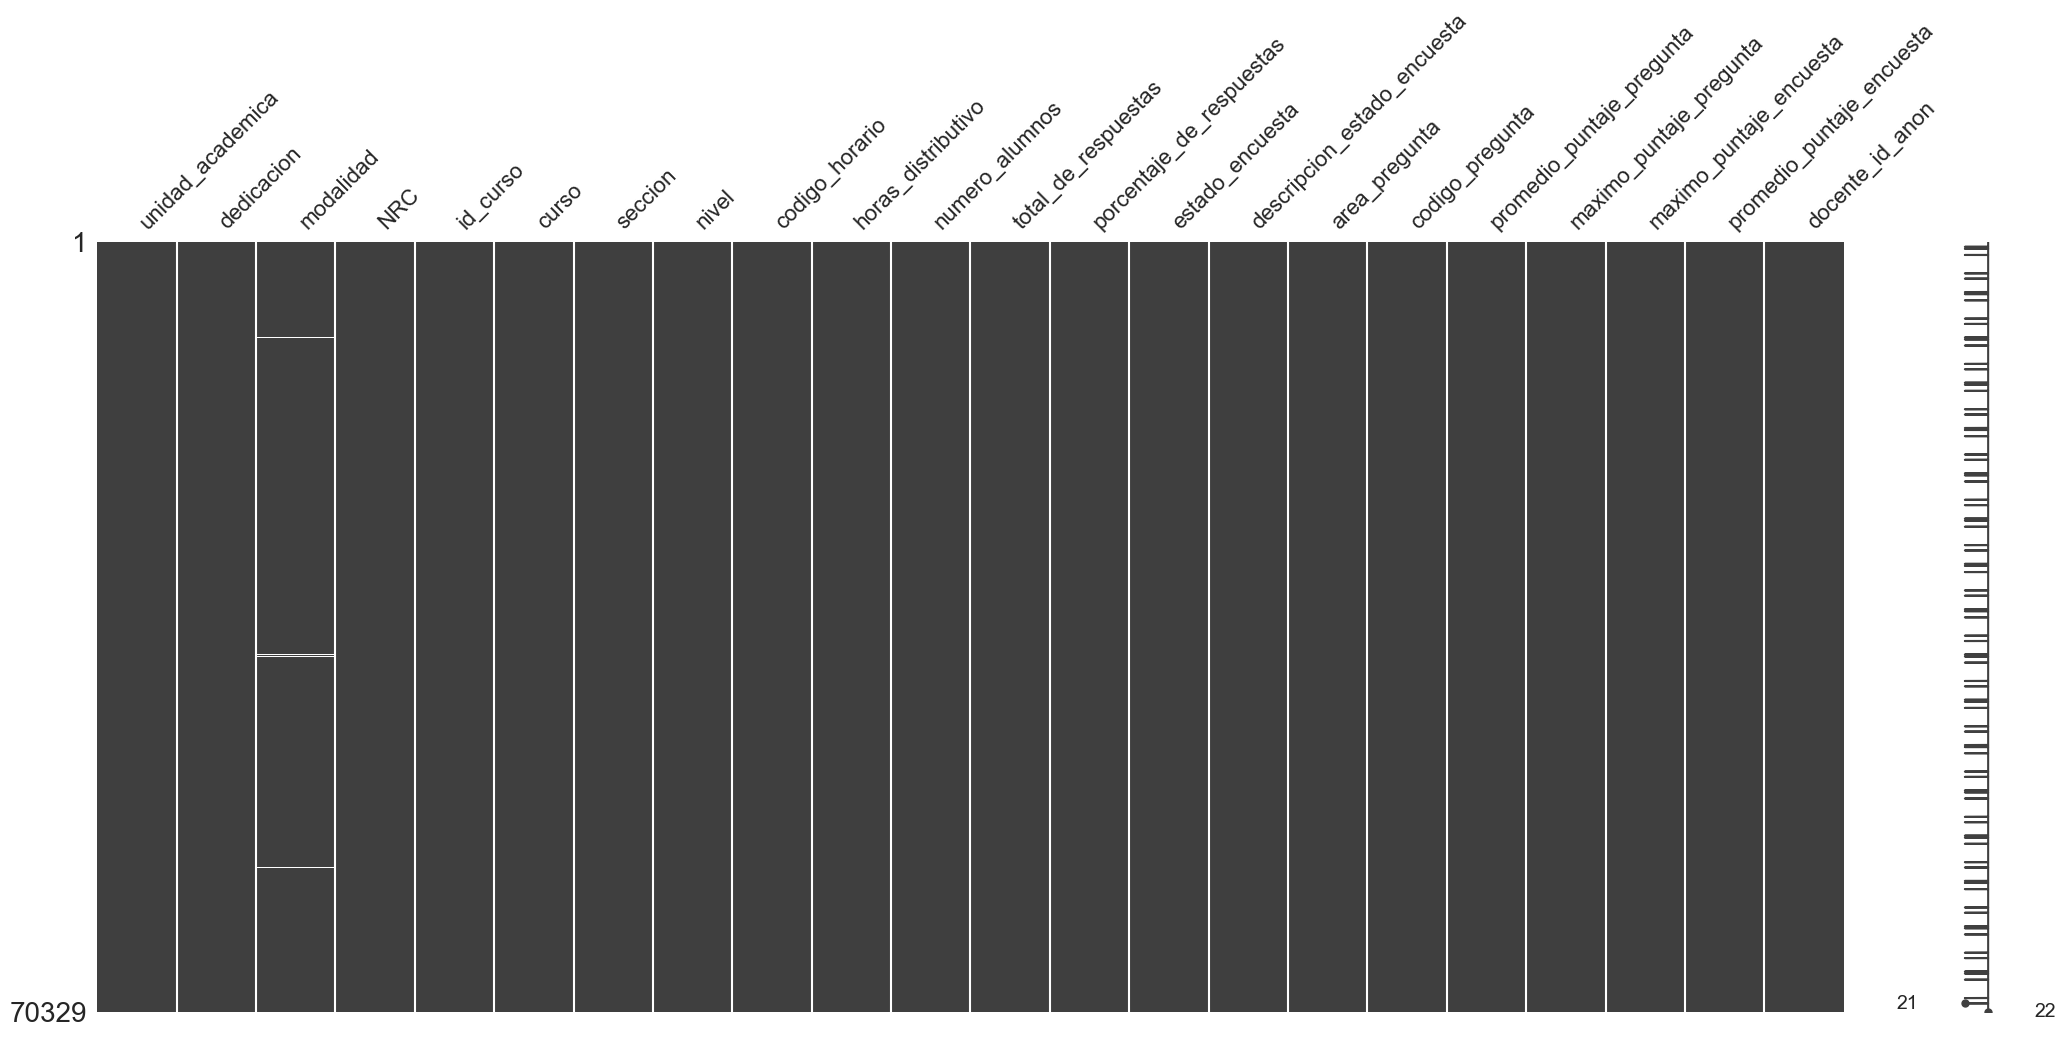

In [235]:
msno.matrix(df_heteroevaluacion)

In [236]:
df_heteroevaluacion.isna().sum()

unidad_academica                 0
dedicacion                       0
modalidad                      476
NRC                              0
id_curso                         0
curso                            0
seccion                          0
nivel                            0
codigo_horario                   0
horas_distributivo               0
numero_alumnos                   0
total_de_respuestas              0
porcentaje_de_respuestas         0
estado_encuesta                  0
descripcion_estado_encuesta      0
area_pregunta                    0
codigo_pregunta                  0
promedio_puntaje_pregunta        0
maximo_puntaje_pregunta          0
maximo_puntaje_encuesta          0
promedio_puntaje_encuesta        0
docente_id_anon                  0
dtype: int64

**Imputación de valores faltantes en el campo modalidad**

In [237]:
df_heteroevaluacion['modalidad'].value_counts(dropna=False)

modalidad
No titular    41361
Titular       28492
NaN             476
Name: count, dtype: int64

Ahora se analizará a cuantos docentes corresponden los valores NaN, ya que la tabla anterior muestra el número de registros de evaluación por cada pregunta del cuestionario de heteroevaluación

In [238]:
docentes_sin_modalidad = (
    df_heteroevaluacion[df_heteroevaluacion['modalidad'].isna()]
    .loc[:, ['docente_id_anon', 'modalidad']]
    .drop_duplicates()
)

docentes_sin_modalidad

,docente_id_anon,modalidad
438,b0c830a59a,NaN
622,8581dafe81,NaN
1185,fdb88fedc7,NaN
2862,16ec34f394,NaN
3348,3ce7317285,NaN


La decisión metodológica en este punto es **mantener los 5 docentes que no tienen definida una modalidad, debido a que no se trata de una variable clave para el clustering, sino una para interpretación posterior.**
Sin embargo, se sustituirán los campos no definidos por el texto "No definido"

In [239]:
df_heteroevaluacion['modalidad'] = df_heteroevaluacion['modalidad'].fillna('No definido')
df_heteroevaluacion['modalidad'].value_counts(dropna=False)

modalidad
No titular     41361
Titular        28492
No definido      476
Name: count, dtype: int64

**Análisis de los diferentes valores que pueden tomar los campos categóricos**

In [240]:
df_heteroevaluacion['unidad_academica'].value_counts(dropna=False)

unidad_academica
Facultad de Ciencias Médicas                                  26537
Facultad de Filosofía, Letras y Ciencias de la Educación       6698
Facultad de Artes                                              5848
Facultad de Ciencias Económicas y Administrativas              5763
Facultad de Ciencias Agropecuarias                             4811
Facultad de Ingeniería                                         4539
Facultad de Ciencias Químicas                                  4522
Facultad de Arquitectura y Urbanismo                           2856
Facultad de Ciencias de la Hospitalidad                        2363
Facultad de Jurisprudencia y Ciencias Políticas y Sociales     2329
Facultad de Psicología                                         2125
Facultad de Odontología                                        1938
Name: count, dtype: int64

In [241]:
df_heteroevaluacion['dedicacion'].value_counts(dropna=False)
#df_heteroevaluacion.value_counts(['modalidad', 'dedicacion'], dropna=False)

dedicacion
Tiempo completo       47668
Tiempo parcial        10132
Medio tiempo           9894
Por horas              2176
Sentencia judicial      459
Name: count, dtype: int64

In [242]:
df_heteroevaluacion['nivel'].value_counts(dropna=False)

nivel
Nivel 4                           13668
Nivel 2                           13175
Nivel 6                           12512
Nivel 8                            7582
Nivel 7                            3961
Nivel 1                            3842
Nivel 3                            3468
Nivel 10                           3281
Nivel 9                            2397
Nivel 5                            2227
N/D                                1955
Con/Res, Pl urb, Dis arq I8         306
Educ mus, Eje mus, Prod mus I6      187
Con/Res, Pl urb, Dis arq I9         170
Pro alim, Quim ing, Cal ag I9       119
Prod agro, Rec nat, Biot ag I8      102
Pro alim, Quim ing, Cal ag I10      102
Clin anim men, Prod animal I10       85
Educ mus, Eje mus, Prod mus I8       85
Gest conoc, Ing software I8          68
Gest conoc, Ing software I7          68
Cont autom, Sist ener elect I8       68
Prod agro, Rec nat, Biot ag I7       68
Clin anim men, Prod animal I9        68
Gest conoc, Ing software I10      

En el campo **nivel**, se identifican 1955 registros no definidos (N/D). 
A continuación se identifica a cuántos docentes pertenecen estos niveles sin definir.

In [243]:
docentes_sin_nivel = (
    df_heteroevaluacion[df_heteroevaluacion['nivel']=='N/D']
    .loc[:, ['docente_id_anon', 'nivel']]
    .drop_duplicates()
)

docentes_sin_nivel

,docente_id_anon,nivel
223,ad16ca27ca,N/D
1231,9ccaadec87,N/D
1808,78df52cb14,N/D
1977,d5df4f3446,N/D
2010,449ad1a1e6,N/D
2303,9d9604c317,N/D
2454,9a14e57148,N/D
2571,88bd3caba5,N/D
2590,fcf151afe8,N/D
2777,75c81eab8e,N/D


Son 23 docentes los que tienen registros sin definir. 
A continuación se identifica a cuantos cursos diferentes pertenecen los valores no definidos.

In [244]:
nrc_sin_nivel = (
    df_heteroevaluacion[df_heteroevaluacion['nivel']=='N/D']
    .loc[:, ['NRC', 'nivel']]
    .drop_duplicates()
)

nrc_sin_nivel

,NRC,nivel
223,2532,N/D
224,2537,N/D
1231,2144,N/D
1232,2151,N/D
1233,2160,N/D
...,...,...
3982,3264,N/D
3983,5640,N/D
4079,2379,N/D
4080,2395,N/D


En este caso, se analiza el contexto de la variable y se define como una variable que no se usará en el clustering debido a que no es una característica de los resultados de evaluación docente, sino que define el contexto de la enseñanza; en este sentido, se decide dejar los valores no definidos. Esto debido a que eliminar los 115 NRC afectados implicaría eliminar información válida de desempeño docente que es de gran valor para el clustering; adicionalmente, no es recomendable imputar valores debido a que, es una variable que depende directamente de un plan de estudios, siendo imposible su inferencia desde otros valores.

Por lo tanto, se procede a categorizar el nivel en 4 grupos: "Inferior", "Intermedio", "Superior" y "No definido", de la siguiente manera:

| Nivel numérico | Categoría   |
|----------------|-------------|
| 1 – 3          | Inferior    |
| 4 – 7          | Intermedio  |
| 8 – 10         | Superior    |
| N/D            | No definido |


In [245]:
df_heteroevaluacion['nivel_num'] = df_heteroevaluacion['nivel'].astype(str).str.extract(r'(\d+)$').astype(float)

df_heteroevaluacion['nivel_categoria'] = np.select(
    [
        df_heteroevaluacion['nivel_num'].between(1, 3),
        df_heteroevaluacion['nivel_num'].between(4, 7),
        df_heteroevaluacion['nivel_num'].between(8, 10),
        df_heteroevaluacion['nivel_num'].isna()
    ],
    [
        'Inferior',
        'Intermedio',
        'Superior',
        'No definido'
    ],
    default='No definido'
)

df_heteroevaluacion

,unidad_academica,dedicacion,modalidad,NRC,id_curso,curso,seccion,nivel,codigo_horario,horas_distributivo,...,descripcion_estado_encuesta,area_pregunta,codigo_pregunta,promedio_puntaje_pregunta,maximo_puntaje_pregunta,maximo_puntaje_encuesta,promedio_puntaje_encuesta,docente_id_anon,nivel_num,nivel_categoria
0,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1967,DERE-00050,Medicinal legal,G1,Nivel 6,CDE,4,...,Activo,AMB1,HE01,4.47,5,5,4.45,3ff4fa200f,6.0,Intermedio
1,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1969,DERE-00050,Medicinal legal,G2,Nivel 6,CDE,4,...,Activo,AMB1,HE01,4.79,5,5,4.75,3ff4fa200f,6.0,Intermedio
2,Facultad de Jurisprudencia y Ciencias Política...,Por horas,No titular,3406,FJUR-00165,Derecho administrativo III,G1,Nivel 6,CDE,2,...,Activo,AMB1,HE01,4.22,5,5,4.55,3f21684cb8,6.0,Intermedio
3,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4433,SALU-00232,Infectologia,G2,Nivel 7,ACD,3,...,Activo,AMB1,HE01,4.70,5,5,4.78,f19c322bde,7.0,Intermedio
4,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4435,SALU-00232,Infectologia,S9,Nivel 7,APE,1,...,Activo,AMB1,HE01,4.00,5,5,4.53,f19c322bde,7.0,Intermedio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70324,Facultad de Ciencias Médicas,Tiempo completo,No titular,3350,TTIT-00042,Uic I,S6,Nivel 8,APE,1,...,Activo,AMB5,HE17,3.50,4,5,5.00,7bbc2edf29,8.0,Superior
70325,Facultad de Ciencias Médicas,Tiempo completo,No titular,3547,SALU-00207,Perf. microbiología,G1,Nivel 8,ACD,4,...,Activo,AMB5,HE17,3.65,4,5,4.50,7bbc2edf29,8.0,Superior
70326,Facultad de Ciencias Económicas y Administrativas,Por horas,No titular,1945,CSCO-00064,Pensamiento y vision emprend,G1,Nivel 1,CDE,4,...,Activo,AMB5,HE17,3.38,4,5,4.93,53d9f840e7,1.0,Inferior
70327,Facultad de Ciencias Agropecuarias,Tiempo parcial,No titular,1342,INGE-00010,Mecanización agrícola,G1,Nivel 6,CDE,7,...,Activo,AMB5,HE17,3.33,4,5,5.00,04b01440e3,6.0,Intermedio


In [246]:
# categorías de nivel
df_heteroevaluacion['nivel_categoria'].value_counts(dropna=False)

nivel_categoria
Intermedio     33048
Inferior       20485
Superior       14841
No definido     1955
Name: count, dtype: int64

In [247]:
#código de horario
df_heteroevaluacion['codigo_horario'].value_counts(dropna=False)

codigo_horario
CDE    38590
APE    19941
ACD    11798
Name: count, dtype: int64

### Agregaciones para obtener la evaluación por docente

Como parte de la preparación del dataset final, es necesario resumir los datos para obtener una evaluación por cada docente, por lo que a continuación se realizan dichas agregaciones.

**Promedio del docente por ámbito de evaluación** 

In [248]:
# obtiene la nota promedio del docente por cada uno de los ámbitos evaluados
df_ambito = (df_heteroevaluacion.groupby(['docente_id_anon', 'area_pregunta']).agg(
        promedio_ambito=('promedio_puntaje_pregunta', 'mean')
    )
    .reset_index()
)
df_ambito

,docente_id_anon,area_pregunta,promedio_ambito
0,003847d92f,AMB1,4.774500
1,003847d92f,AMB2,4.624000
2,003847d92f,AMB3,4.743333
3,003847d92f,AMB4,4.829000
4,003847d92f,AMB5,3.974500
...,...,...,...
4850,ff75d5cdaf,AMB1,4.517812
4851,ff75d5cdaf,AMB2,4.451250
4852,ff75d5cdaf,AMB3,4.532083
4853,ff75d5cdaf,AMB4,4.505000


In [249]:
#Trasponer los ámbitos long-to-wide
df_ambito_wide = (df_ambito.pivot(index='docente_id_anon', columns='area_pregunta', values='promedio_ambito').reset_index())

df_ambito_wide

area_pregunta,docente_id_anon,AMB1,AMB2,AMB3,AMB4,AMB5
0,003847d92f,4.774500,4.624000,4.743333,4.829000,3.97450
1,01b18ea6b5,4.620000,4.340000,4.640000,4.700000,3.60000
2,01e18b2e76,5.000000,4.965000,5.000000,4.965000,4.00375
3,01e5ecfd0a,4.613125,4.545000,4.675000,4.653750,3.77625
4,02248cd4fa,4.457500,4.404000,4.536667,4.506000,3.59150
...,...,...,...,...,...,...
966,fdb88fedc7,4.730000,4.733500,4.732000,4.760000,3.79300
967,fe30504a5a,4.488000,4.531500,4.494000,4.570000,3.74650
968,fe849c36a8,4.125000,4.292500,4.073333,4.547500,3.31875
969,fec860fd22,4.796944,4.809722,4.814815,4.847778,3.84750


In [250]:
df_ambito_wide.describe()

area_pregunta,AMB1,AMB2,AMB3,AMB4,AMB5
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,4.574293,4.560180,4.596146,4.617266,3.716219
std,0.303471,0.317161,0.304078,0.301281,0.270671
min,2.795000,2.547500,3.000000,2.770000,2.321667
25%,4.435000,4.413437,4.458667,4.492250,3.591375
50%,4.629792,4.630000,4.663333,4.697500,3.767917
75%,4.788750,4.780625,4.806667,4.815000,3.907917
max,5.000000,5.000000,5.000000,5.000000,4.250000


In [251]:
df_ambito_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   docente_id_anon  971 non-null    object 
 1   AMB1             971 non-null    float64
 2   AMB2             971 non-null    float64
 3   AMB3             971 non-null    float64
 4   AMB4             971 non-null    float64
 5   AMB5             971 non-null    float64
dtypes: float64(5), object(1)
memory usage: 45.6+ KB


**Recuento de áreas de conocimiento que imparte un docente**

In [252]:
# obtiene solo las letras del área de conocimiento desde el campo id_curso que está formado por: código de materia + número de curso
df_heteroevaluacion['area_conocimiento'] = df_heteroevaluacion['id_curso'].astype(str).str[:4]
df_heteroevaluacion

,unidad_academica,dedicacion,modalidad,NRC,id_curso,curso,seccion,nivel,codigo_horario,horas_distributivo,...,area_pregunta,codigo_pregunta,promedio_puntaje_pregunta,maximo_puntaje_pregunta,maximo_puntaje_encuesta,promedio_puntaje_encuesta,docente_id_anon,nivel_num,nivel_categoria,area_conocimiento
0,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1967,DERE-00050,Medicinal legal,G1,Nivel 6,CDE,4,...,AMB1,HE01,4.47,5,5,4.45,3ff4fa200f,6.0,Intermedio,DERE
1,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1969,DERE-00050,Medicinal legal,G2,Nivel 6,CDE,4,...,AMB1,HE01,4.79,5,5,4.75,3ff4fa200f,6.0,Intermedio,DERE
2,Facultad de Jurisprudencia y Ciencias Política...,Por horas,No titular,3406,FJUR-00165,Derecho administrativo III,G1,Nivel 6,CDE,2,...,AMB1,HE01,4.22,5,5,4.55,3f21684cb8,6.0,Intermedio,FJUR
3,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4433,SALU-00232,Infectologia,G2,Nivel 7,ACD,3,...,AMB1,HE01,4.70,5,5,4.78,f19c322bde,7.0,Intermedio,SALU
4,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4435,SALU-00232,Infectologia,S9,Nivel 7,APE,1,...,AMB1,HE01,4.00,5,5,4.53,f19c322bde,7.0,Intermedio,SALU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70324,Facultad de Ciencias Médicas,Tiempo completo,No titular,3350,TTIT-00042,Uic I,S6,Nivel 8,APE,1,...,AMB5,HE17,3.50,4,5,5.00,7bbc2edf29,8.0,Superior,TTIT
70325,Facultad de Ciencias Médicas,Tiempo completo,No titular,3547,SALU-00207,Perf. microbiología,G1,Nivel 8,ACD,4,...,AMB5,HE17,3.65,4,5,4.50,7bbc2edf29,8.0,Superior,SALU
70326,Facultad de Ciencias Económicas y Administrativas,Por horas,No titular,1945,CSCO-00064,Pensamiento y vision emprend,G1,Nivel 1,CDE,4,...,AMB5,HE17,3.38,4,5,4.93,53d9f840e7,1.0,Inferior,CSCO
70327,Facultad de Ciencias Agropecuarias,Tiempo parcial,No titular,1342,INGE-00010,Mecanización agrícola,G1,Nivel 6,CDE,7,...,AMB5,HE17,3.33,4,5,5.00,04b01440e3,6.0,Intermedio,INGE


In [253]:
# recuento del número de áreas de conocimiento en las que dicta clases un docente
n_areas = (df_heteroevaluacion.groupby('docente_id_anon')['area_conocimiento'].nunique().reset_index(name='n_areas_conocimiento'))

n_areas

,docente_id_anon,n_areas_conocimiento
0,003847d92f,1
1,01b18ea6b5,1
2,01e18b2e76,1
3,01e5ecfd0a,3
4,02248cd4fa,1
...,...,...
966,fdb88fedc7,2
967,fe30504a5a,2
968,fe849c36a8,1
969,fec860fd22,1


In [254]:
n_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   docente_id_anon       971 non-null    object
 1   n_areas_conocimiento  971 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


**Recuento de cursos (nrcs) que imparte un docente**

In [255]:
n_nrcs = (df_heteroevaluacion.groupby('docente_id_anon')['NRC'].nunique().reset_index(name='n_nrc'))
n_nrcs

,docente_id_anon,n_nrc
0,003847d92f,5
1,01b18ea6b5,1
2,01e18b2e76,2
3,01e5ecfd0a,4
4,02248cd4fa,5
...,...,...
966,fdb88fedc7,5
967,fe30504a5a,5
968,fe849c36a8,2
969,fec860fd22,9


In [256]:
n_nrcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   docente_id_anon  971 non-null    object
 1   n_nrc            971 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


**Información del contrato del docente (modalidad y dedicación), eliminando duplicados**

In [257]:
df_caracteristicas_contrato = df_heteroevaluacion[['docente_id_anon', 'modalidad', 'dedicacion']].drop_duplicates().reset_index(drop=True)

df_caracteristicas_contrato

,docente_id_anon,modalidad,dedicacion
0,3ff4fa200f,No titular,Tiempo parcial
1,3f21684cb8,No titular,Por horas
2,f19c322bde,No titular,Tiempo parcial
3,1c175e15bf,Titular,Tiempo completo
4,62e47dba0e,Titular,Tiempo completo
...,...,...,...
981,6d10a29040,Titular,Medio tiempo
982,0d06ab77d3,Titular,Tiempo completo
983,7bbc2edf29,No titular,Tiempo completo
984,53d9f840e7,No titular,Por horas


Se identifica cuáles y cuantos docentes tienen más de una modalidad o más de un tipo de dedicación

In [258]:
# varias modalidades
docentes_multi_modalidad = (
    df_caracteristicas_contrato.groupby('docente_id_anon')['modalidad']
      .nunique()
      .reset_index(name='num_modalidades')
      .query('num_modalidades > 1')
)

print('Docentes con más de una modalidad:', docentes_multi_modalidad.shape[0])

Docentes con más de una modalidad: 0


In [259]:
# varios tipos de dedicación
docentes_multi_dedicacion = (
    df_caracteristicas_contrato.groupby('docente_id_anon')['dedicacion']
      .nunique()
      .reset_index(name='num_dedicaciones')
      .query('num_dedicaciones > 1')
)

print('Docentes con más de un tipo de dedicación:', docentes_multi_dedicacion.shape[0])

docentes_multi_dedicacion

Docentes con más de un tipo de dedicación: 15


,docente_id_anon,num_dedicaciones
35,0aa65d42a2,2
122,2208c474d8,2
133,2478ad1fd4,2
143,26c69c3af9,2
294,4bacb76e2b,2
349,57af108ec0,2
412,6861e43189,2
466,75b73ecba0,2
484,7964e71e27,2
490,7aaf230f3a,2


In [260]:
# identificar las combinaciones de dedicaciones que tiene un docente
dedicaciones_por_docente = (df_caracteristicas_contrato[['docente_id_anon', 'dedicacion']].drop_duplicates().groupby('docente_id_anon')['dedicacion'].apply(lambda x: tuple(sorted(x))).reset_index(name='combinacion_dedicacion')
)

combinaciones_dedicacion = dedicaciones_por_docente[dedicaciones_por_docente['combinacion_dedicacion'].apply(len) > 1]

combinaciones_dedicacion['combinacion_dedicacion'].value_counts()

combinacion_dedicacion
(Por horas, Tiempo completo)       12
(Medio tiempo, Por horas)           1
(Por horas, Tiempo parcial)         1
(Medio tiempo, Tiempo completo)     1
Name: count, dtype: int64

En este caso, la decisión es unificar las diferentes dedicaciones que se le han asignado al mismo docente, esto debido a que es una variable que se usará para definir el contexto de los grupos, más no para usarla en el clustering.

In [261]:
agg_dict = {
    'dedicacion': lambda x: ' + '.join(sorted(x.unique())),
    'modalidad': 'first',
}

df_caracteristicas_contrato = (
    df_caracteristicas_contrato
    .groupby('docente_id_anon', as_index=False)
    .agg(agg_dict)
)

df_caracteristicas_contrato[df_caracteristicas_contrato['dedicacion'].str.contains('\+')]

,docente_id_anon,dedicacion,modalidad
35,0aa65d42a2,Por horas + Tiempo completo,No titular
122,2208c474d8,Por horas + Tiempo completo,No titular
133,2478ad1fd4,Por horas + Tiempo completo,Titular
143,26c69c3af9,Medio tiempo + Por horas,No titular
294,4bacb76e2b,Por horas + Tiempo completo,Titular
349,57af108ec0,Por horas + Tiempo completo,Titular
412,6861e43189,Por horas + Tiempo parcial,No titular
466,75b73ecba0,Por horas + Tiempo completo,No titular
484,7964e71e27,Por horas + Tiempo completo,Titular
490,7aaf230f3a,Por horas + Tiempo completo,Titular


**Niveles en los que imparte clase un docente**

In [262]:
df_niveles_docente = (
    df_heteroevaluacion[['docente_id_anon', 'nivel_categoria']]
    .drop_duplicates()
    .groupby('docente_id_anon')['nivel_categoria']
    .apply(lambda x: ' + '.join(sorted(x)))
    .reset_index(name='niveles_docente')
)

df_niveles_docente['niveles_docente'].value_counts()


niveles_docente
Intermedio                             238
Inferior + Intermedio                  180
Intermedio + Superior                  158
Inferior                               121
Inferior + Intermedio + Superior       105
Superior                                80
Inferior + Superior                     66
No definido                             14
Intermedio + No definido                 5
Inferior + No definido                   1
No definido + Superior                   1
Intermedio + No definido + Superior      1
Inferior + Intermedio + No definido      1
Name: count, dtype: int64

In [263]:
df_niveles_docente

,docente_id_anon,niveles_docente
0,003847d92f,Intermedio
1,01b18ea6b5,Inferior
2,01e18b2e76,Intermedio
3,01e5ecfd0a,Intermedio + Superior
4,02248cd4fa,Inferior + Intermedio
...,...,...
966,fdb88fedc7,Inferior + Intermedio + Superior
967,fe30504a5a,Intermedio + Superior
968,fe849c36a8,Inferior
969,fec860fd22,Intermedio


**Agregación de los datos de participación por docente**

In [264]:
#se obtiene un dataframe de NRCs únicos por docente
df_nrc = (df_heteroevaluacion.drop_duplicates(subset=['docente_id_anon', 'NRC']))
df_nrc

,unidad_academica,dedicacion,modalidad,NRC,id_curso,curso,seccion,nivel,codigo_horario,horas_distributivo,...,area_pregunta,codigo_pregunta,promedio_puntaje_pregunta,maximo_puntaje_pregunta,maximo_puntaje_encuesta,promedio_puntaje_encuesta,docente_id_anon,nivel_num,nivel_categoria,area_conocimiento
0,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1967,DERE-00050,Medicinal legal,G1,Nivel 6,CDE,4,...,AMB1,HE01,4.47,5,5,4.45,3ff4fa200f,6.0,Intermedio,DERE
1,Facultad de Jurisprudencia y Ciencias Política...,Tiempo parcial,No titular,1969,DERE-00050,Medicinal legal,G2,Nivel 6,CDE,4,...,AMB1,HE01,4.79,5,5,4.75,3ff4fa200f,6.0,Intermedio,DERE
2,Facultad de Jurisprudencia y Ciencias Política...,Por horas,No titular,3406,FJUR-00165,Derecho administrativo III,G1,Nivel 6,CDE,2,...,AMB1,HE01,4.22,5,5,4.55,3f21684cb8,6.0,Intermedio,FJUR
3,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4433,SALU-00232,Infectologia,G2,Nivel 7,ACD,3,...,AMB1,HE01,4.70,5,5,4.78,f19c322bde,7.0,Intermedio,SALU
4,Facultad de Ciencias Médicas,Tiempo parcial,No titular,4435,SALU-00232,Infectologia,S9,Nivel 7,APE,1,...,AMB1,HE01,4.00,5,5,4.53,f19c322bde,7.0,Intermedio,SALU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,Facultad de Ciencias Médicas,Tiempo completo,No titular,3350,TTIT-00042,Uic I,S6,Nivel 8,APE,1,...,AMB1,HE01,5.00,5,5,5.00,7bbc2edf29,8.0,Superior,TTIT
4133,Facultad de Ciencias Médicas,Tiempo completo,No titular,3547,SALU-00207,Perf. microbiología,G1,Nivel 8,ACD,4,...,AMB1,HE01,4.45,5,5,4.50,7bbc2edf29,8.0,Superior,SALU
4134,Facultad de Ciencias Económicas y Administrativas,Por horas,No titular,1945,CSCO-00064,Pensamiento y vision emprend,G1,Nivel 1,CDE,4,...,AMB1,HE01,4.94,5,5,4.93,53d9f840e7,1.0,Inferior,CSCO
4135,Facultad de Ciencias Agropecuarias,Tiempo parcial,No titular,1342,INGE-00010,Mecanización agrícola,G1,Nivel 6,CDE,7,...,AMB1,HE01,5.00,5,5,5.00,04b01440e3,6.0,Intermedio,INGE


In [265]:
# se obtiene el total de alumnos, el total de encuestas respondidas por alumnos y el total de horas de docencia por cada docente único
df_participacion_carga = (df_nrc.groupby('docente_id_anon').agg(
        total_respuestas=('total_de_respuestas', 'sum'),
        total_alumnos=('numero_alumnos', 'sum'),
        horas_distributivo=('horas_distributivo', 'sum')
    )
    .reset_index()
)

df_participacion_carga['promedio_participacion'] = df_participacion_carga['total_respuestas']/df_participacion_carga['total_alumnos']*100

df_participacion_carga

,docente_id_anon,total_respuestas,total_alumnos,horas_distributivo,promedio_participacion
0,003847d92f,65,87,12,74.712644
1,01b18ea6b5,25,28,2,89.285714
2,01e18b2e76,33,38,10,86.842105
3,01e5ecfd0a,90,96,17,93.750000
4,02248cd4fa,135,142,20,95.070423
...,...,...,...,...,...
966,fdb88fedc7,141,156,19,90.384615
967,fe30504a5a,132,138,14,95.652174
968,fe849c36a8,65,70,8,92.857143
969,fec860fd22,87,113,18,76.991150


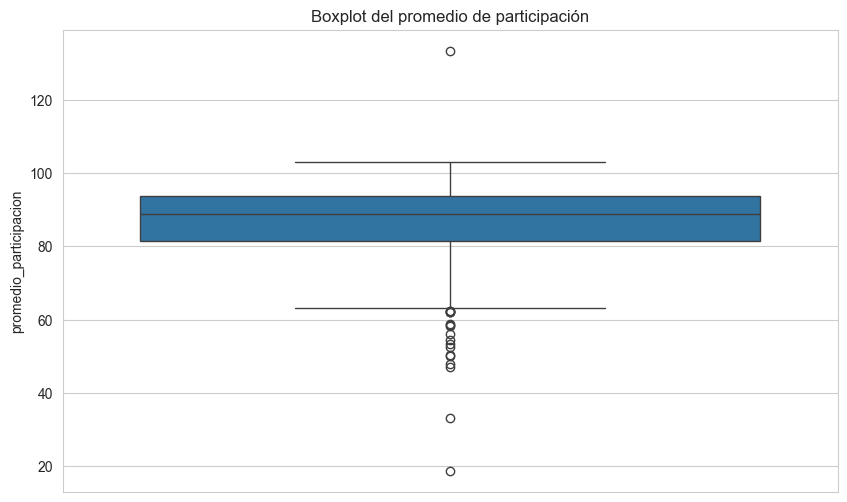

In [266]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_participacion_carga['promedio_participacion'])
plt.title('Boxplot del promedio de participación')
plt.show()

Se identifica que existen valores de participación superiores al 100%; se procede a ajustar tanto el número de alumnos como el porcentaje de participación

In [267]:
# identifica los registros con inconsistencias en la participación de estudiantes
df_inconsistencia_participación = df_participacion_carga[df_participacion_carga['promedio_participacion']>100]
df_inconsistencia_participación

,docente_id_anon,total_respuestas,total_alumnos,horas_distributivo,promedio_participacion
373,5e33bb7231,100,97,15,103.092784
434,6e52d37145,81,80,12,101.250000
785,cab6bc413e,35,34,8,102.941176
851,db33da060d,46,45,11,102.222222
924,f260d43e7c,88,87,14,101.149425
964,fcf151afe8,4,3,6,133.333333


In [268]:
# Se reemplazan los valores superiores a 100 con este límite máximo y el total de alumnos con el total de respuestas recibidas
aux = df_inconsistencia_participación['promedio_participacion'] > 100

df_inconsistencia_participación.loc[aux, 'total_alumnos'] = df_inconsistencia_participación.loc[aux, 'total_respuestas']
df_inconsistencia_participación.loc[aux, 'promedio_participacion'] = 100

df_inconsistencia_participación

,docente_id_anon,total_respuestas,total_alumnos,horas_distributivo,promedio_participacion
373,5e33bb7231,100,100,15,100.0
434,6e52d37145,81,81,12,100.0
785,cab6bc413e,35,35,8,100.0
851,db33da060d,46,46,11,100.0
924,f260d43e7c,88,88,14,100.0
964,fcf151afe8,4,4,6,100.0


### Integración de las variables del dataset de evaluación, después de la limpieza y agregaciones

In [269]:
df_heteroevaluacion_final = (
    df_ambito_wide                                     #dataset con la evaluación por ámbito evaluado
    .merge(n_areas, on='docente_id_anon', how='left')  #dataset con el número de áreas de conocimiento por docente
    .merge(n_nrcs, on='docente_id_anon', how='left')   #dataset con el número de cursos en los que el docente imparte clase
    .merge(df_participacion_carga, on='docente_id_anon', how='left') #dataset con la participación en la evaluación y datos de carga horaria 
    .merge(df_caracteristicas_contrato, on='docente_id_anon') #dataset con variables referentes a las características del contrato del docente
    .merge(df_niveles_docente, on='docente_id_anon', how='left')   #dataset con los niveles en los que imparte clases el docente
)

df_heteroevaluacion_final

,docente_id_anon,AMB1,AMB2,AMB3,AMB4,AMB5,n_areas_conocimiento,n_nrc,total_respuestas,total_alumnos,horas_distributivo,promedio_participacion,dedicacion,modalidad,niveles_docente
0,003847d92f,4.774500,4.624000,4.743333,4.829000,3.97450,1,5,65,87,12,74.712644,Tiempo completo,Titular,Intermedio
1,01b18ea6b5,4.620000,4.340000,4.640000,4.700000,3.60000,1,1,25,28,2,89.285714,Medio tiempo,No titular,Inferior
2,01e18b2e76,5.000000,4.965000,5.000000,4.965000,4.00375,1,2,33,38,10,86.842105,Tiempo completo,Titular,Intermedio
3,01e5ecfd0a,4.613125,4.545000,4.675000,4.653750,3.77625,3,4,90,96,17,93.750000,Tiempo completo,Titular,Intermedio + Superior
4,02248cd4fa,4.457500,4.404000,4.536667,4.506000,3.59150,1,5,135,142,20,95.070423,Tiempo completo,No titular,Inferior + Intermedio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,fdb88fedc7,4.730000,4.733500,4.732000,4.760000,3.79300,2,5,141,156,19,90.384615,Por horas,No definido,Inferior + Intermedio + Superior
967,fe30504a5a,4.488000,4.531500,4.494000,4.570000,3.74650,2,5,132,138,14,95.652174,Tiempo completo,No titular,Intermedio + Superior
968,fe849c36a8,4.125000,4.292500,4.073333,4.547500,3.31875,1,2,65,70,8,92.857143,Tiempo parcial,No titular,Inferior
969,fec860fd22,4.796944,4.809722,4.814815,4.847778,3.84750,1,9,87,113,18,76.991150,Medio tiempo,No titular,Intermedio


In [270]:
df_heteroevaluacion_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   docente_id_anon         971 non-null    object 
 1   AMB1                    971 non-null    float64
 2   AMB2                    971 non-null    float64
 3   AMB3                    971 non-null    float64
 4   AMB4                    971 non-null    float64
 5   AMB5                    971 non-null    float64
 6   n_areas_conocimiento    971 non-null    int64  
 7   n_nrc                   971 non-null    int64  
 8   total_respuestas        971 non-null    int64  
 9   total_alumnos           971 non-null    int64  
 10  horas_distributivo      971 non-null    int64  
 11  promedio_participacion  971 non-null    float64
 12  dedicacion              971 non-null    object 
 13  modalidad               971 non-null    object 
 14  niveles_docente         971 non-null    ob

## Datasets adicionales

### **Datos de coevaluación**

In [271]:
df_coevaluacion = pd.read_excel("Datos/coevaluacion_anonimizado.xlsx")
df_coevaluacion

,docente_id_anon,autoridades,pares
0,2a49811525,100.0,100.0
1,56b684c588,100.0,100.0
2,ad16ca27ca,100.0,100.0
3,47c70de2ae,100.0,100.0
4,a830da5cb5,100.0,100.0
...,...,...,...
1008,2610c363f3,100.0,100.0
1009,9e54b53a46,100.0,100.0
1010,c2afcbebe7,100.0,100.0
1011,bd3d57cec2,100.0,100.0


Análisis de valores faltantes y outliers 

In [272]:
df_coevaluacion.isna().sum()

docente_id_anon    85
autoridades        13
pares              13
dtype: int64

In [273]:
#existen 85 docentes sin identificación, por lo que se procede a eliminarlos
df_coevaluacion=df_coevaluacion.dropna(subset = ['docente_id_anon'])
df_coevaluacion.isna().sum()

docente_id_anon    0
autoridades        3
pares              3
dtype: int64

**Nota:** la imputación de valores nulos en la nota de coevaluación se realizará una vez integradas las fuentes

In [274]:
df_coevaluacion.describe()

,autoridades,pares
count,925.000000,925.000000
mean,99.151100,98.900349
std,4.719626,4.265851
min,61.666600,37.777733
25%,100.000000,100.000000
50%,100.000000,100.000000
75%,100.000000,100.000000
max,200.000000,125.000000


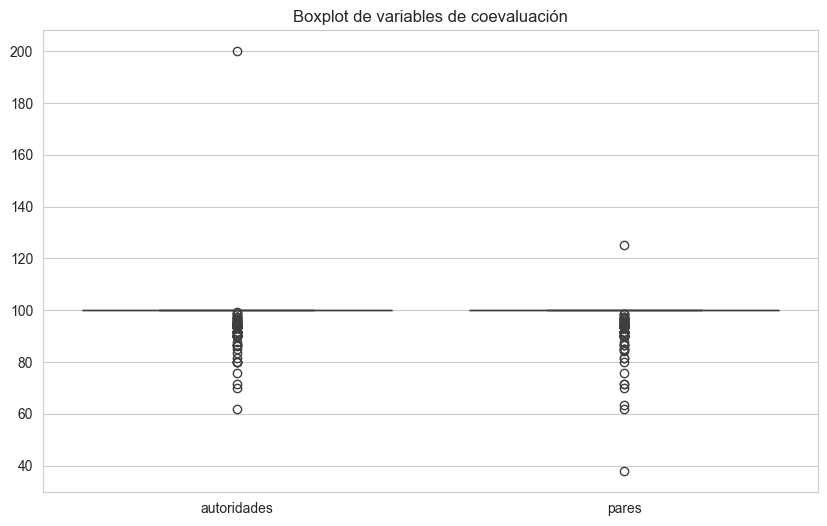

In [275]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_coevaluacion)
plt.title('Boxplot de variables de coevaluación')
plt.show()

In [276]:
#Se verifica la existencia de evaluaciones mayores a 100 puntos en evaluación por autoridades
df_inconsistencias_coevaluacion = df_coevaluacion[(df_coevaluacion['autoridades']>100) | (df_coevaluacion['pares']>100)]
df_inconsistencias_coevaluacion

,docente_id_anon,autoridades,pares
103,b9407564d3,100.0,125.0
531,0d6f8503d3,200.0,100.0


In [277]:
# se reemplaza con la nota máxima (100 puntos)
condicion1 = df_coevaluacion['autoridades'] > 100
condicion2 = df_coevaluacion['pares'] > 100

df_coevaluacion.loc[condicion1, 'autoridades'] = 100
df_coevaluacion.loc[condicion2, 'pares'] = 100

In [278]:
# se obtiene una calificación de coevaluación por docente
df_coevaluacion = df_coevaluacion.groupby('docente_id_anon').agg(
        autoridades = ('autoridades', 'mean'),
        pares = ('pares', 'mean')
    )

df_coevaluacion

,autoridades,pares
docente_id_anon,,
003847d92f,100.0000,100.0000
01b18ea6b5,100.0000,100.0000
01e18b2e76,100.0000,100.0000
01e5ecfd0a,94.4444,94.4444
02248cd4fa,100.0000,100.0000
...,...,...
fdb88fedc7,100.0000,100.0000
fe30504a5a,100.0000,100.0000
fe849c36a8,100.0000,100.0000


In [279]:
df_coevaluacion.describe()

,autoridades,pares
count,902.000000,902.000000
mean,99.046921,98.884012
std,3.350077,4.081820
min,61.666600,37.777733
25%,100.000000,100.000000
50%,100.000000,100.000000
75%,100.000000,100.000000
max,100.000000,100.000000


## **Datos del análisis de sentimiento en los comentarios de heteroevaluación**

In [280]:
df_sentimiento = pd.read_excel("Datos/sentimiento_anonimizado.xlsx")
df_sentimiento

,docente_id_anon,sentimiento,calificacion
0,e16d29b9a7,"['Positivo', 'Positivo', 'Positivo', 'Neutral'...",78.571429
1,7bfe5404ab,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",83.035714
2,32289ea854,"['Neutral', 'Positivo', 'Positivo', 'Positivo'...",88.455988
3,ec95c4fe17,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",81.318681
4,7286ff985f,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",78.491172
...,...,...,...
990,484977757c,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",77.056277
991,af74b4ff65,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",84.729064
992,17d20b143f,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",86.327783
993,176e5bf0d9,"['Positivo', 'Positivo', 'Positivo', 'Positivo...",86.147186


In [281]:
df_sentimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   docente_id_anon  995 non-null    object 
 1   sentimiento      993 non-null    object 
 2   calificacion     993 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.4+ KB


In [282]:
# se obtiene una calificación de sentimiento por docente
df_sentimiento = df_sentimiento.groupby('docente_id_anon')['calificacion'].mean()
df_sentimiento

docente_id_anon
003847d92f    89.610390
01b18ea6b5    84.920635
01e18b2e76    88.501742
01e5ecfd0a    86.479592
02248cd4fa    84.630542
                ...    
fdb88fedc7    87.779690
fe30504a5a    80.451128
fe849c36a8    80.851064
fec860fd22    85.403727
ff75d5cdaf    82.217782
Name: calificacion, Length: 971, dtype: float64

In [283]:
df_sentimiento.describe()

count    969.000000
mean      84.049643
std        5.029916
min       50.000000
25%       81.389253
50%       84.693878
75%       87.346939
max      100.000000
Name: calificacion, dtype: float64

### **Datos de horas de formación de los docentes**

In [284]:
df_formacion = pd.read_excel("Datos/formacion_anonimizado.xlsx")
df_formacion

,docente_id_anon,competencia,total_horas
0,f527020b1a,Investigativa,8
1,f527020b1a,Pedagógica,22
2,0d5567051a,Pedagógica,10
3,75e87acfbe,Pedagógica,10
4,f12b093415,Pedagógica,14
...,...,...,...
397,NaN,Pedagógica,10
398,NaN,Pedagógica,6
399,NaN,Comunicativa,10
400,NaN,Comunicativa,10


In [285]:
# se obtiene un total de horas de formación por docente
df_formacion = df_formacion.groupby('docente_id_anon')['total_horas'].sum()
df_formacion

docente_id_anon
01b18ea6b5    26
02248cd4fa     6
027d4c106d    20
03a8257aa8    10
0440a53547    10
              ..
f8804eb71b    16
fb0b784972    10
fbd9e01e61     6
fcc62ff18c    34
fdb88fedc7    10
Name: total_horas, Length: 290, dtype: int64

In [286]:
df_formacion.describe()

count    290.000000
mean      14.944828
std       10.407795
min        2.000000
25%       10.000000
50%       10.000000
75%       20.000000
max       66.000000
Name: total_horas, dtype: float64

### **Datos de distributivos docentes**

In [287]:
df_distributivo = pd.read_excel("Datos/horas_no_docente_anonimizado.xlsx")
df_distributivo

,docente_id_anon,ADOC,GEST,INVE,VINC
0,3ff4fa200f,9,0,0,0
1,3f21684cb8,2,0,0,0
2,f19c322bde,4,0,0,0
3,1c175e15bf,5,0,26,4
4,62e47dba0e,6,0,25,0
...,...,...,...,...,...
1152,NaN,40,0,0,0
1153,53d9f840e7,2,0,0,0
1154,NaN,40,0,0,0
1155,04b01440e3,4,0,0,0


In [288]:
df_distributivo = df_distributivo.groupby('docente_id_anon').agg({
        'ADOC': 'sum',
        'GEST': 'sum',
        'INVE': 'sum',
        'VINC': 'sum'
    }).reset_index()

df_distributivo

,docente_id_anon,ADOC,GEST,INVE,VINC
0,003847d92f,18,0,10,0
1,01b18ea6b5,2,0,0,0
2,01e18b2e76,4,2,22,2
3,01e5ecfd0a,8,10,5,0
4,02248cd4fa,6,0,14,0
...,...,...,...,...,...
955,fdb88fedc7,7,10,1,3
956,fe30504a5a,9,2,12,3
957,fe849c36a8,4,0,0,0
958,fec860fd22,2,0,0,0


In [289]:
df_distributivo.describe()

,ADOC,GEST,INVE,VINC
count,960.000000,960.000000,960.000000,960.000000
mean,8.357292,4.050000,3.658333,1.418750
std,5.802668,6.459435,6.020640,3.296863
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000
75%,10.000000,6.000000,6.000000,2.000000
max,40.000000,35.000000,26.000000,40.000000


In [290]:
df_distributivo.isna().sum()

docente_id_anon    0
ADOC               0
GEST               0
INVE               0
VINC               0
dtype: int64

### Integración de todas las fuentes

In [291]:
df_final = (
    df_heteroevaluacion_final                                   #dataset con notas de heteroevaluacion
    .merge(df_coevaluacion, on='docente_id_anon', how='left')   #dataset con notas de coevaluacion
    .merge(df_sentimiento, on='docente_id_anon', how='left')    #dataset con resultados del análisis de sentimiento en comentarios dejados por estudiantes en las preguntas abiertas del cuestionario de heteroevaluación
    .merge(df_formacion, on='docente_id_anon', how='left')      #dataset con horas de formación de los docentes
    .merge(df_distributivo, on='docente_id_anon', how='left')   #dataset con la carga horaria del docente por función sustantiva
)

df_final

,docente_id_anon,AMB1,AMB2,AMB3,AMB4,AMB5,n_areas_conocimiento,n_nrc,total_respuestas,total_alumnos,...,modalidad,niveles_docente,autoridades,pares,calificacion,total_horas,ADOC,GEST,INVE,VINC
0,003847d92f,4.774500,4.624000,4.743333,4.829000,3.97450,1,5,65,87,...,Titular,Intermedio,100.0000,100.0000,89.610390,NaN,18.0,0.0,10.0,0.0
1,01b18ea6b5,4.620000,4.340000,4.640000,4.700000,3.60000,1,1,25,28,...,No titular,Inferior,100.0000,100.0000,84.920635,26.0,2.0,0.0,0.0,0.0
2,01e18b2e76,5.000000,4.965000,5.000000,4.965000,4.00375,1,2,33,38,...,Titular,Intermedio,100.0000,100.0000,88.501742,NaN,4.0,2.0,22.0,2.0
3,01e5ecfd0a,4.613125,4.545000,4.675000,4.653750,3.77625,3,4,90,96,...,Titular,Intermedio + Superior,94.4444,94.4444,86.479592,NaN,8.0,10.0,5.0,0.0
4,02248cd4fa,4.457500,4.404000,4.536667,4.506000,3.59150,1,5,135,142,...,No titular,Inferior + Intermedio,100.0000,100.0000,84.630542,6.0,6.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,fdb88fedc7,4.730000,4.733500,4.732000,4.760000,3.79300,2,5,141,156,...,No definido,Inferior + Intermedio + Superior,100.0000,100.0000,87.779690,10.0,7.0,10.0,1.0,3.0
967,fe30504a5a,4.488000,4.531500,4.494000,4.570000,3.74650,2,5,132,138,...,No titular,Intermedio + Superior,100.0000,100.0000,80.451128,NaN,9.0,2.0,12.0,3.0
968,fe849c36a8,4.125000,4.292500,4.073333,4.547500,3.31875,1,2,65,70,...,No titular,Inferior,100.0000,100.0000,80.851064,NaN,4.0,0.0,0.0,0.0
969,fec860fd22,4.796944,4.809722,4.814815,4.847778,3.84750,1,9,87,113,...,No titular,Intermedio,100.0000,100.0000,85.403727,NaN,2.0,0.0,0.0,0.0


In [292]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   docente_id_anon         971 non-null    object 
 1   AMB1                    971 non-null    float64
 2   AMB2                    971 non-null    float64
 3   AMB3                    971 non-null    float64
 4   AMB4                    971 non-null    float64
 5   AMB5                    971 non-null    float64
 6   n_areas_conocimiento    971 non-null    int64  
 7   n_nrc                   971 non-null    int64  
 8   total_respuestas        971 non-null    int64  
 9   total_alumnos           971 non-null    int64  
 10  horas_distributivo      971 non-null    int64  
 11  promedio_participacion  971 non-null    float64
 12  dedicacion              971 non-null    object 
 13  modalidad               971 non-null    object 
 14  niveles_docente         971 non-null    ob

In [293]:
#Unificar las horas de docencia, que está conformado por las horas de clase más las horas de otras actividades de docencia
df_final['ADOC'] = df_final['ADOC']+df_final['horas_distributivo'] 
df_final.head()

,docente_id_anon,AMB1,AMB2,AMB3,AMB4,AMB5,n_areas_conocimiento,n_nrc,total_respuestas,total_alumnos,...,modalidad,niveles_docente,autoridades,pares,calificacion,total_horas,ADOC,GEST,INVE,VINC
0,003847d92f,4.774500,4.624,4.743333,4.82900,3.97450,1,5,65,87,...,Titular,Intermedio,100.0000,100.0000,89.610390,NaN,30.0,0.0,10.0,0.0
1,01b18ea6b5,4.620000,4.340,4.640000,4.70000,3.60000,1,1,25,28,...,No titular,Inferior,100.0000,100.0000,84.920635,26.0,4.0,0.0,0.0,0.0
2,01e18b2e76,5.000000,4.965,5.000000,4.96500,4.00375,1,2,33,38,...,Titular,Intermedio,100.0000,100.0000,88.501742,NaN,14.0,2.0,22.0,2.0
3,01e5ecfd0a,4.613125,4.545,4.675000,4.65375,3.77625,3,4,90,96,...,Titular,Intermedio + Superior,94.4444,94.4444,86.479592,NaN,25.0,10.0,5.0,0.0
4,02248cd4fa,4.457500,4.404,4.536667,4.50600,3.59150,1,5,135,142,...,No titular,Inferior + Intermedio,100.0000,100.0000,84.630542,6.0,26.0,0.0,14.0,0.0


In [294]:
#renombar los campos del dataset final para que se entiendan mejor las variables
df_final = df_final.rename(columns={
    'AMB1': 'nota_AMB1',
    'AMB2': 'nota_AMB2',
    'AMB3': 'nota_AMB3',
    'AMB4': 'nota_AMB4',
    'promedio_participacion': 'porcentaje_participacion',
    'autoridades': 'nota_autoridades',
    'pares': 'nota_pares',
    'calificacion': 'nota_sentimiento',
    'total_horas': 'horas_formacion',
    'ADOC': 'horas_ADOC',
    'GEST': 'horas_GEST',
    'INVE': 'horas_INVE',
    'VINC': 'horas_VINC'
})

#reorganización de la estructura del dataset para facilitar el análisis
df_final = df_final[['docente_id_anon', 'nota_AMB1', 'nota_AMB2', 'nota_AMB3', 'nota_AMB4', 'nota_autoridades', 'nota_pares', 'nota_sentimiento', 'total_alumnos', 'total_respuestas', 'porcentaje_participacion','n_nrc', 'n_areas_conocimiento', 'niveles_docente', 'dedicacion', 'modalidad', 'horas_formacion', 'horas_ADOC', 'horas_GEST', 'horas_INVE', 'horas_VINC']]

In [295]:
df_final.head()

,docente_id_anon,nota_AMB1,nota_AMB2,nota_AMB3,nota_AMB4,nota_autoridades,nota_pares,nota_sentimiento,total_alumnos,total_respuestas,...,n_nrc,n_areas_conocimiento,niveles_docente,dedicacion,modalidad,horas_formacion,horas_ADOC,horas_GEST,horas_INVE,horas_VINC
0,003847d92f,4.774500,4.624,4.743333,4.82900,100.0000,100.0000,89.610390,87,65,...,5,1,Intermedio,Tiempo completo,Titular,NaN,30.0,0.0,10.0,0.0
1,01b18ea6b5,4.620000,4.340,4.640000,4.70000,100.0000,100.0000,84.920635,28,25,...,1,1,Inferior,Medio tiempo,No titular,26.0,4.0,0.0,0.0,0.0
2,01e18b2e76,5.000000,4.965,5.000000,4.96500,100.0000,100.0000,88.501742,38,33,...,2,1,Intermedio,Tiempo completo,Titular,NaN,14.0,2.0,22.0,2.0
3,01e5ecfd0a,4.613125,4.545,4.675000,4.65375,94.4444,94.4444,86.479592,96,90,...,4,3,Intermedio + Superior,Tiempo completo,Titular,NaN,25.0,10.0,5.0,0.0
4,02248cd4fa,4.457500,4.404,4.536667,4.50600,100.0000,100.0000,84.630542,142,135,...,5,1,Inferior + Intermedio,Tiempo completo,No titular,6.0,26.0,0.0,14.0,0.0


<Axes: >

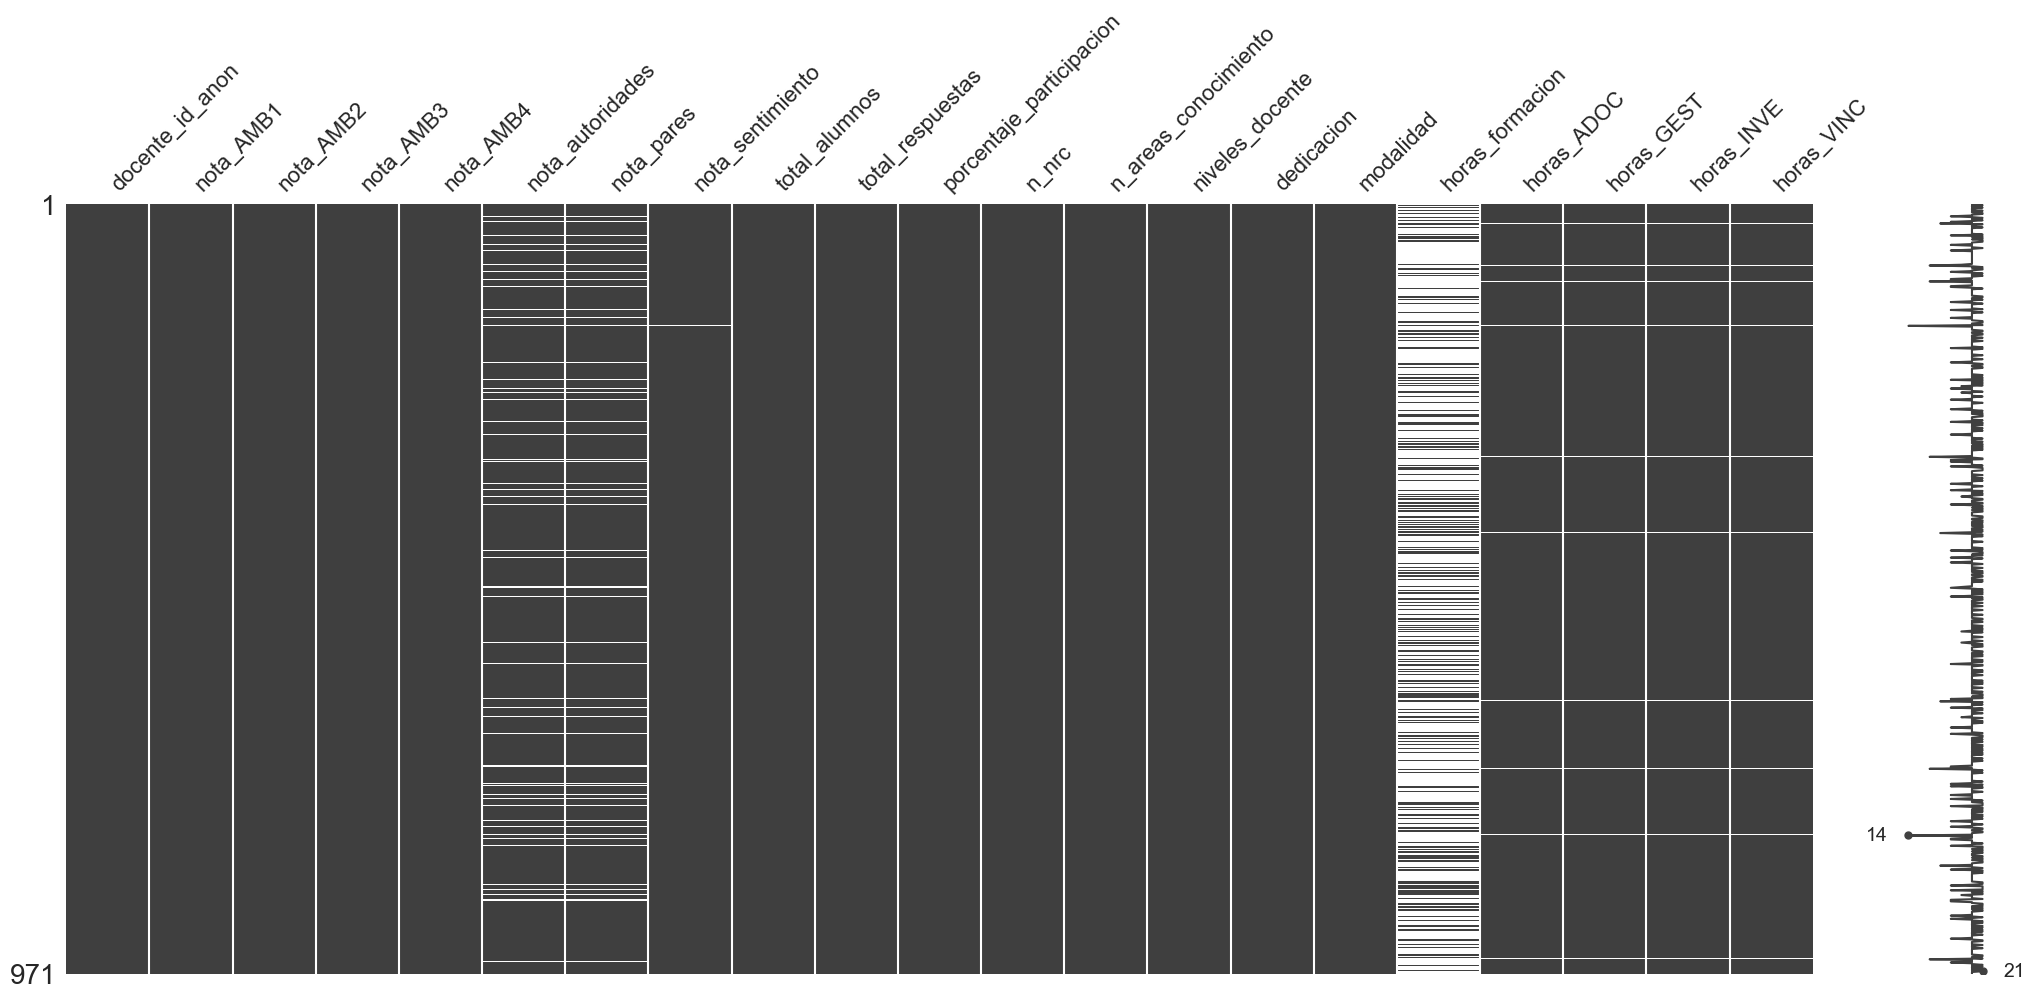

In [296]:
#identificación de valores faltantes
msno.matrix(df_final)

**Imputación de valores faltantes en el dataset final**

*Imputación de la nota de coevaluación por pares y autoridades*

In [297]:
# Nota de coevaluación por pares y autoridades:
# Se realiza la imputación en base a la mediana por grupos de docentes, teniendo en cuenta la modalidad y la dedicación

# Indicador de coevaluación: 0 no tiene coevaluación, 1 si tiene coevaluación
df_final['tiene_coevaluacion'] = df_final[['nota_pares', 'nota_autoridades']].notna().all(axis=1).astype(int)

# 2. Imputación por mediana usando modalidad + dedicación
for col in ['nota_pares', 'nota_autoridades']:
    df_final[col] = df_final[col].fillna(
        df_final.groupby(['modalidad', 'dedicacion'])[col].transform('median')
    )

# 3. Respaldo: mediana global (por si algún grupo quedó sin valores)
for col in ['nota_pares', 'nota_autoridades']:
    df_final[col] = df_final[col].fillna(df_final[col].median())
    
df_final

,docente_id_anon,nota_AMB1,nota_AMB2,nota_AMB3,nota_AMB4,nota_autoridades,nota_pares,nota_sentimiento,total_alumnos,total_respuestas,...,n_areas_conocimiento,niveles_docente,dedicacion,modalidad,horas_formacion,horas_ADOC,horas_GEST,horas_INVE,horas_VINC,tiene_coevaluacion
0,003847d92f,4.774500,4.624000,4.743333,4.829000,100.0000,100.0000,89.610390,87,65,...,1,Intermedio,Tiempo completo,Titular,NaN,30.0,0.0,10.0,0.0,1
1,01b18ea6b5,4.620000,4.340000,4.640000,4.700000,100.0000,100.0000,84.920635,28,25,...,1,Inferior,Medio tiempo,No titular,26.0,4.0,0.0,0.0,0.0,1
2,01e18b2e76,5.000000,4.965000,5.000000,4.965000,100.0000,100.0000,88.501742,38,33,...,1,Intermedio,Tiempo completo,Titular,NaN,14.0,2.0,22.0,2.0,1
3,01e5ecfd0a,4.613125,4.545000,4.675000,4.653750,94.4444,94.4444,86.479592,96,90,...,3,Intermedio + Superior,Tiempo completo,Titular,NaN,25.0,10.0,5.0,0.0,1
4,02248cd4fa,4.457500,4.404000,4.536667,4.506000,100.0000,100.0000,84.630542,142,135,...,1,Inferior + Intermedio,Tiempo completo,No titular,6.0,26.0,0.0,14.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,fdb88fedc7,4.730000,4.733500,4.732000,4.760000,100.0000,100.0000,87.779690,156,141,...,2,Inferior + Intermedio + Superior,Por horas,No definido,10.0,26.0,10.0,1.0,3.0,1
967,fe30504a5a,4.488000,4.531500,4.494000,4.570000,100.0000,100.0000,80.451128,138,132,...,2,Intermedio + Superior,Tiempo completo,No titular,NaN,23.0,2.0,12.0,3.0,1
968,fe849c36a8,4.125000,4.292500,4.073333,4.547500,100.0000,100.0000,80.851064,70,65,...,1,Inferior,Tiempo parcial,No titular,NaN,12.0,0.0,0.0,0.0,1
969,fec860fd22,4.796944,4.809722,4.814815,4.847778,100.0000,100.0000,85.403727,113,87,...,1,Intermedio,Medio tiempo,No titular,NaN,20.0,0.0,0.0,0.0,1


*Imputación del valor del sentimiento en los comentarios dejados por los estudiantes*

In [298]:
# Análisis de sentimientos:
# Se realiza la imputación de los valores faltantes en el análisis de sentimientos de 4 docentes, usando la mediana general del conjunto de datos, ya que es un número reducido de docentes 
df_final['nota_sentimiento'] = df_final['nota_sentimiento'].fillna(df_final['nota_sentimiento'].median())
df_final.describe()

,nota_AMB1,nota_AMB2,nota_AMB3,nota_AMB4,nota_autoridades,nota_pares,nota_sentimiento,total_alumnos,total_respuestas,porcentaje_participacion,n_nrc,n_areas_conocimiento,horas_formacion,horas_ADOC,horas_GEST,horas_INVE,horas_VINC,tiene_coevaluacion
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,290.000000,960.000000,960.000000,960.000000,960.000000,971.000000
mean,4.574293,4.560180,4.596146,4.617266,99.114648,98.963315,84.050970,87.265705,75.442842,86.999991,4.179197,1.572606,14.944828,20.803125,4.050000,3.658333,1.418750,0.928939
std,0.303471,0.317161,0.304078,0.301281,3.238009,3.944410,5.024813,55.061198,47.030146,9.800441,2.841304,0.791470,10.407795,9.004679,6.459435,6.020640,3.296863,0.257059
min,2.795000,2.547500,3.000000,2.770000,61.666600,37.777733,50.000000,1.000000,1.000000,18.750000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.435000,4.413437,4.458667,4.492250,100.000000,100.000000,81.392301,47.500000,41.000000,81.481481,2.000000,1.000000,10.000000,15.000000,0.000000,0.000000,0.000000,1.000000
50%,4.629792,4.630000,4.663333,4.697500,100.000000,100.000000,84.693878,79.000000,69.000000,88.888889,3.000000,1.000000,10.000000,20.000000,0.000000,0.000000,0.000000,1.000000
75%,4.788750,4.780625,4.806667,4.815000,100.000000,100.000000,87.346939,116.000000,99.000000,93.806441,5.000000,2.000000,20.000000,27.000000,6.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,100.000000,100.000000,100.000000,390.000000,320.000000,133.333333,21.000000,5.000000,66.000000,62.000000,35.000000,26.000000,40.000000,1.000000


*Imputación de las horas de capacitación*

In [299]:
#Imputación de valores faltantes en horas de capacitación, se coloca 0, ya que indica que los docentes no se han capacitado
#De la misma manera se imputan los valores faltantes en las horas de distributivo, colocando 0 en aquellos que presentan ausencia
df_final['horas_formacion'] = df_final['horas_formacion'].fillna(0)
df_final['horas_ADOC'] = df_final['horas_ADOC'].fillna(0)
df_final['horas_GEST'] = df_final['horas_GEST'].fillna(0)
df_final['horas_INVE'] = df_final['horas_INVE'].fillna(0)
df_final['horas_VINC'] = df_final['horas_VINC'].fillna(0)

In [300]:
df_final.isna().sum()

docente_id_anon             0
nota_AMB1                   0
nota_AMB2                   0
nota_AMB3                   0
nota_AMB4                   0
nota_autoridades            0
nota_pares                  0
nota_sentimiento            0
total_alumnos               0
total_respuestas            0
porcentaje_participacion    0
n_nrc                       0
n_areas_conocimiento        0
niveles_docente             0
dedicacion                  0
modalidad                   0
horas_formacion             0
horas_ADOC                  0
horas_GEST                  0
horas_INVE                  0
horas_VINC                  0
tiene_coevaluacion          0
dtype: int64

Se corrigen los tipos de datos

In [301]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   docente_id_anon           971 non-null    object 
 1   nota_AMB1                 971 non-null    float64
 2   nota_AMB2                 971 non-null    float64
 3   nota_AMB3                 971 non-null    float64
 4   nota_AMB4                 971 non-null    float64
 5   nota_autoridades          971 non-null    float64
 6   nota_pares                971 non-null    float64
 7   nota_sentimiento          971 non-null    float64
 8   total_alumnos             971 non-null    int64  
 9   total_respuestas          971 non-null    int64  
 10  porcentaje_participacion  971 non-null    float64
 11  n_nrc                     971 non-null    int64  
 12  n_areas_conocimiento      971 non-null    int64  
 13  niveles_docente           971 non-null    object 
 14  dedicacion

In [302]:
df_type_map = {
    'horas_formacion': 'int64',
    'horas_ADOC': 'int64',
    'horas_GEST': 'int64',
    'horas_INVE': 'int64',
    'horas_VINC': 'int64'
}

df_final = df_final.astype(df_type_map)

In [303]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   docente_id_anon           971 non-null    object 
 1   nota_AMB1                 971 non-null    float64
 2   nota_AMB2                 971 non-null    float64
 3   nota_AMB3                 971 non-null    float64
 4   nota_AMB4                 971 non-null    float64
 5   nota_autoridades          971 non-null    float64
 6   nota_pares                971 non-null    float64
 7   nota_sentimiento          971 non-null    float64
 8   total_alumnos             971 non-null    int64  
 9   total_respuestas          971 non-null    int64  
 10  porcentaje_participacion  971 non-null    float64
 11  n_nrc                     971 non-null    int64  
 12  n_areas_conocimiento      971 non-null    int64  
 13  niveles_docente           971 non-null    object 
 14  dedicacion

## **Escalado de datos**

In [304]:
#Se normaliza usando Z-Score debido a que preserva la estructura relativa de los datos y funciona bien incluso si las distribuciones no son normales

ambitos = ['nota_AMB1', 'nota_AMB2', 'nota_AMB3', 'nota_AMB4']

#se definen las variables a usar en el clustering y que serán normalizadas
vars_clustering = [
    'nota_AMB1', 'nota_AMB2', 'nota_AMB3', 'nota_AMB4', 
    'nota_pares', 'nota_autoridades', 'nota_sentimiento',
    'total_respuestas', 'total_alumnos'
]

scaler = StandardScaler()

df_scaled = df_final.copy()
df_scaled[vars_clustering] = scaler.fit_transform(df_final[vars_clustering])

df_scaled.describe()

,nota_AMB1,nota_AMB2,nota_AMB3,nota_AMB4,nota_autoridades,nota_pares,nota_sentimiento,total_alumnos,total_respuestas,porcentaje_participacion,n_nrc,n_areas_conocimiento,horas_formacion,horas_ADOC,horas_GEST,horas_INVE,horas_VINC,tiene_coevaluacion
count,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,-1.048252e-15,1.614454e-16,2.599591e-15,-2.016010e-15,6.805404e-16,8.762873e-16,1.761722e-15,-6.951757e-17,5.122347e-17,86.999991,4.179197,1.572606,4.463440,20.567456,4.004119,3.616890,1.402678,0.928939
std,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,9.800441,2.841304,0.791470,8.894076,9.220458,6.437005,5.998925,3.281556,0.257059
min,-5.866163e+00,-6.349201e+00,-5.251838e+00,-6.134522e+00,-1.157111e+01,-1.551997e+01,-6.780057e+00,-1.567531e+00,-1.583691e+00,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.592371e-01,-4.629150e-01,-4.523506e-01,-4.151603e-01,2.735658e-01,2.629594e-01,-5.293808e-01,-7.225814e-01,-7.327341e-01,81.481481,2.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000
50%,1.829728e-01,2.202530e-01,2.210692e-01,2.664475e-01,2.735658e-01,2.629594e-01,1.280124e-01,-1.501959e-01,-1.370645e-01,88.888889,3.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000
75%,7.070435e-01,6.954146e-01,6.926825e-01,6.566493e-01,2.735658e-01,2.629594e-01,6.562765e-01,5.221300e-01,5.011530e-01,93.806441,5.000000,2.000000,6.000000,27.000000,6.000000,6.000000,2.000000,1.000000
max,1.403515e+00,1.387455e+00,1.328812e+00,1.271010e+00,2.735658e-01,2.629594e-01,3.175690e+00,5.500976e+00,5.202688e+00,133.333333,21.000000,5.000000,66.000000,62.000000,35.000000,26.000000,40.000000,1.000000


### Visualización Exploratoria (EDA) 

**Verificar consistencia del dataset**

In [305]:
df_scaled.info()
df_scaled.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   docente_id_anon           971 non-null    object 
 1   nota_AMB1                 971 non-null    float64
 2   nota_AMB2                 971 non-null    float64
 3   nota_AMB3                 971 non-null    float64
 4   nota_AMB4                 971 non-null    float64
 5   nota_autoridades          971 non-null    float64
 6   nota_pares                971 non-null    float64
 7   nota_sentimiento          971 non-null    float64
 8   total_alumnos             971 non-null    float64
 9   total_respuestas          971 non-null    float64
 10  porcentaje_participacion  971 non-null    float64
 11  n_nrc                     971 non-null    int64  
 12  n_areas_conocimiento      971 non-null    int64  
 13  niveles_docente           971 non-null    object 
 14  dedicacion

docente_id_anon             0
nota_AMB1                   0
nota_AMB2                   0
nota_AMB3                   0
nota_AMB4                   0
nota_autoridades            0
nota_pares                  0
nota_sentimiento            0
total_alumnos               0
total_respuestas            0
porcentaje_participacion    0
n_nrc                       0
n_areas_conocimiento        0
niveles_docente             0
dedicacion                  0
modalidad                   0
horas_formacion             0
horas_ADOC                  0
horas_GEST                  0
horas_INVE                  0
horas_VINC                  0
tiene_coevaluacion          0
dtype: int64

**Distribución de las variables indicadoras de desempeño docente**

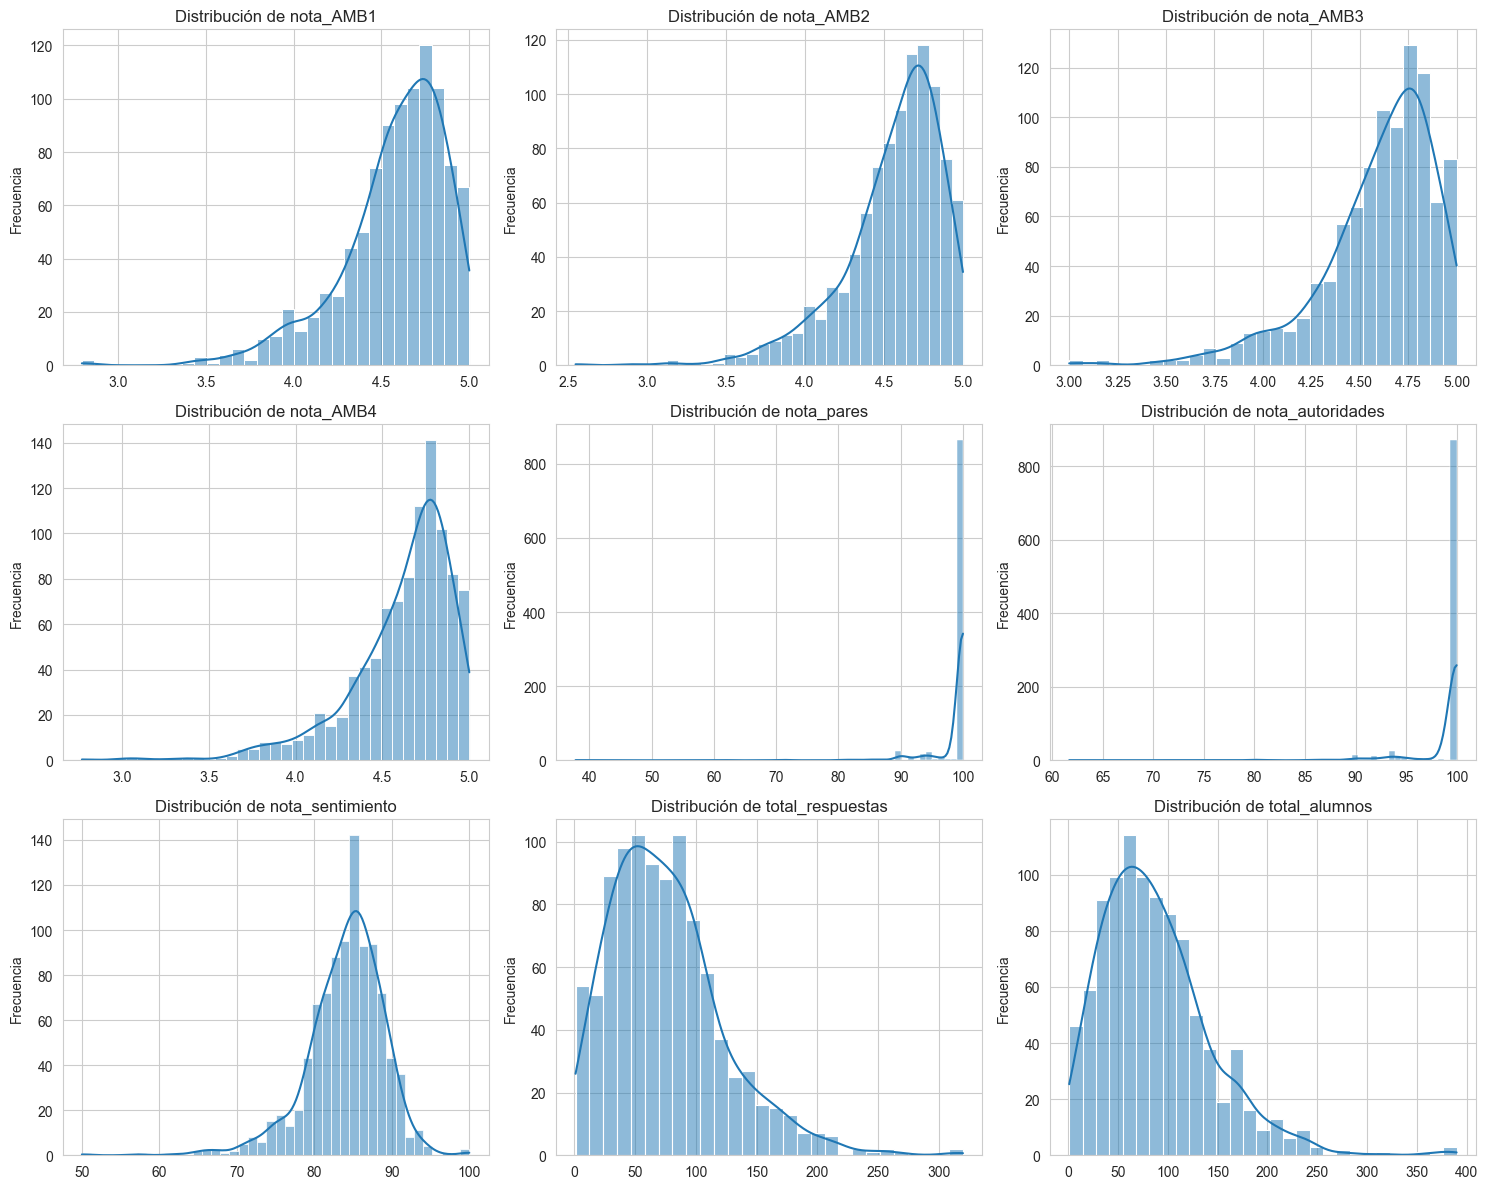

In [306]:
vars_desempeno = [
    'nota_AMB1', 'nota_AMB2', 'nota_AMB3', 'nota_AMB4', 
    'nota_pares', 'nota_autoridades', 'nota_sentimiento'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(vars_clustering):
    sns.histplot(
        data=df_final,
        x=col,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos
for j in range(len(vars_clustering), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Distribución de las variables de contexto**

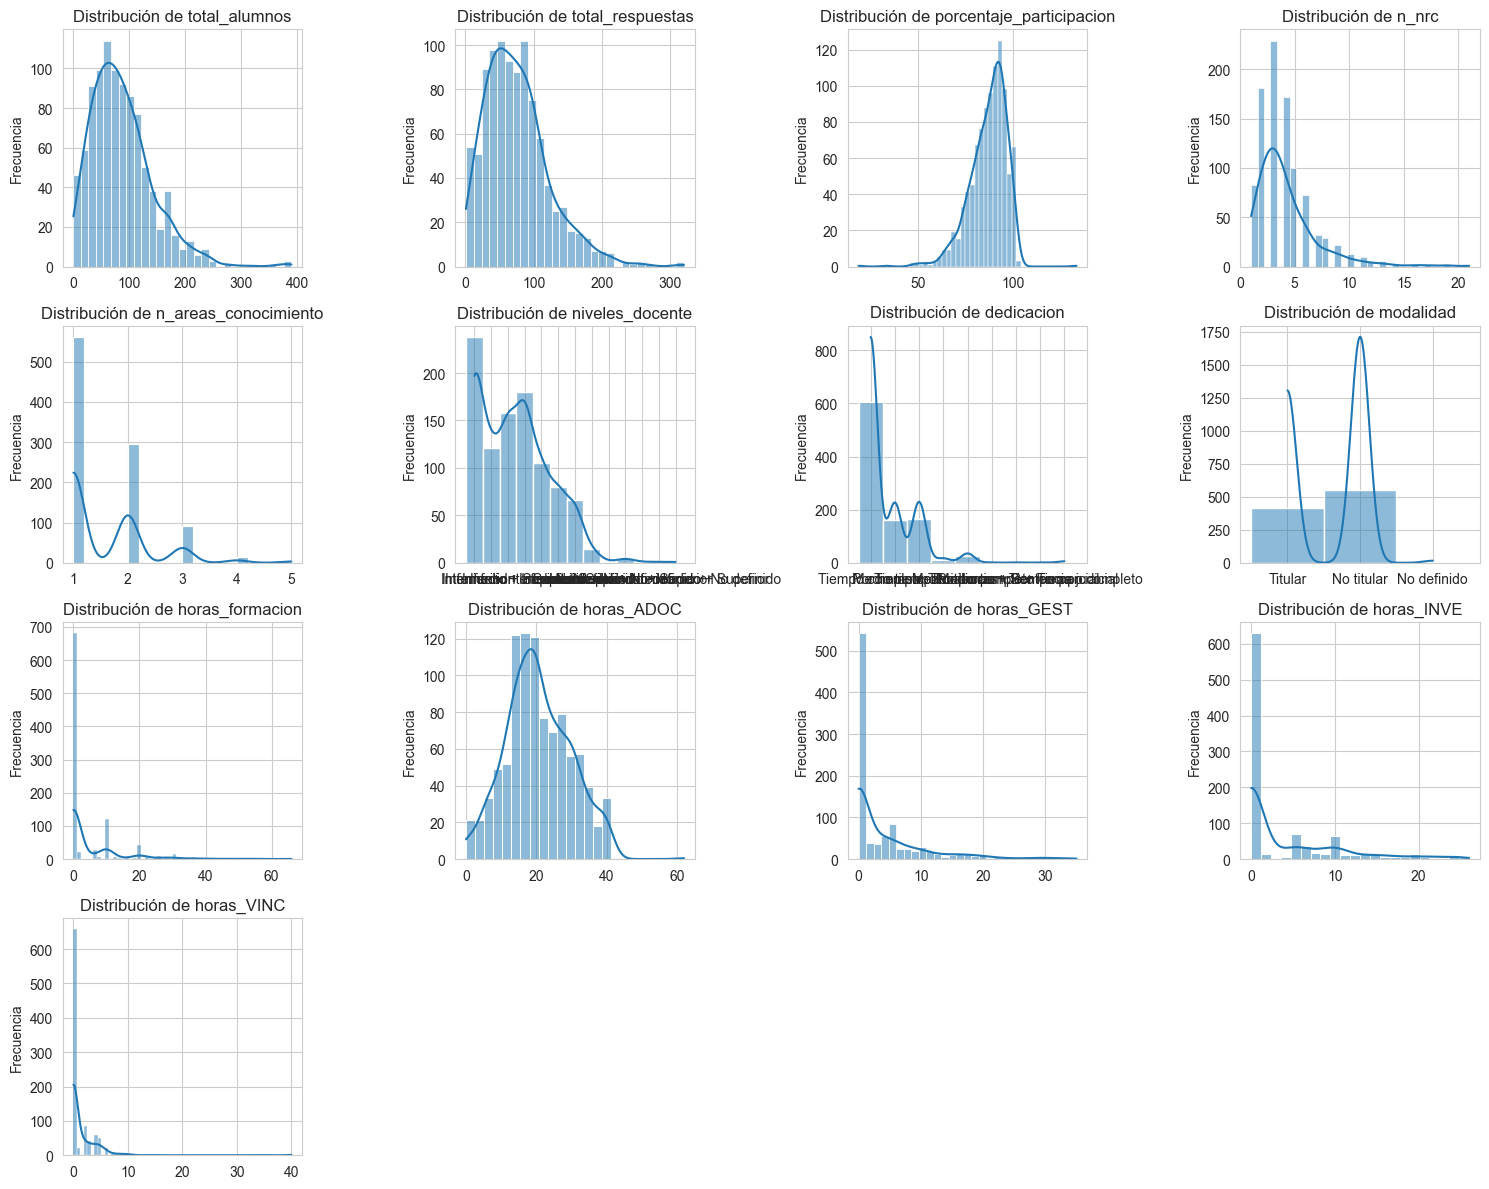

In [307]:
vars_contexto = [
    'total_alumnos', 'total_respuestas', 'porcentaje_participacion', 
    'n_nrc', 'n_areas_conocimiento', 'niveles_docente', 'dedicacion', 'modalidad', 
    'horas_formacion', 'horas_ADOC', 'horas_GEST', 'horas_INVE', 'horas_VINC'
]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(vars_contexto):
    sns.histplot(
        data=df_final,
        x=col,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos
for j in range(len(vars_contexto), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Detección de outliers**

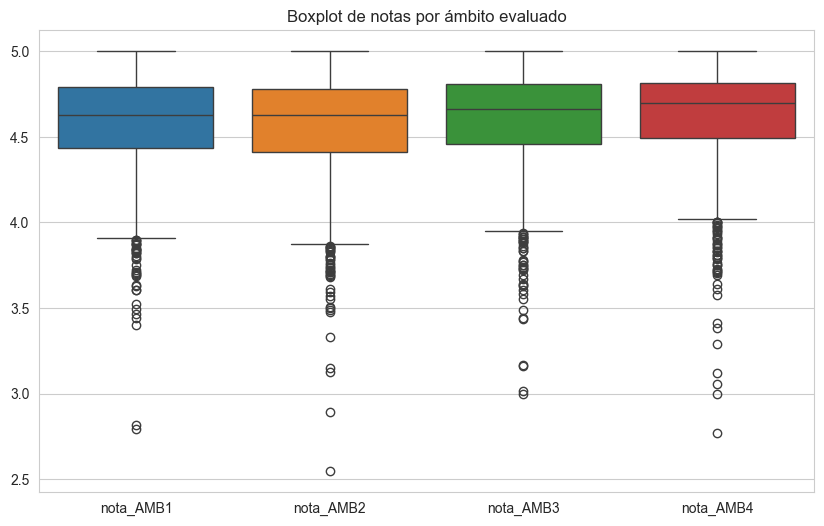

In [308]:
vars_ambito = ['nota_AMB1', 'nota_AMB2', 'nota_AMB3', 'nota_AMB4']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[vars_ambito])
plt.title('Boxplot de notas por ámbito evaluado')
plt.show()

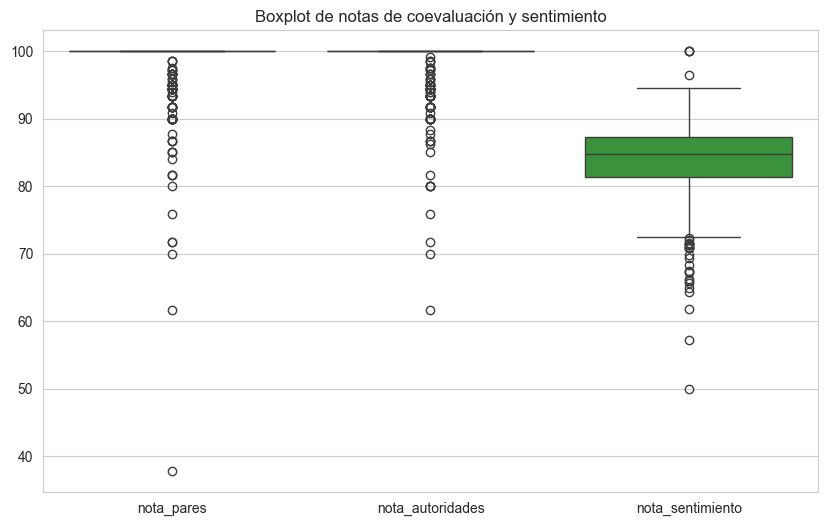

In [309]:
vars_otras_variables = ['nota_pares', 'nota_autoridades', 'nota_sentimiento']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[vars_otras_variables])
plt.title('Boxplot de notas de coevaluación y sentimiento')
plt.show()

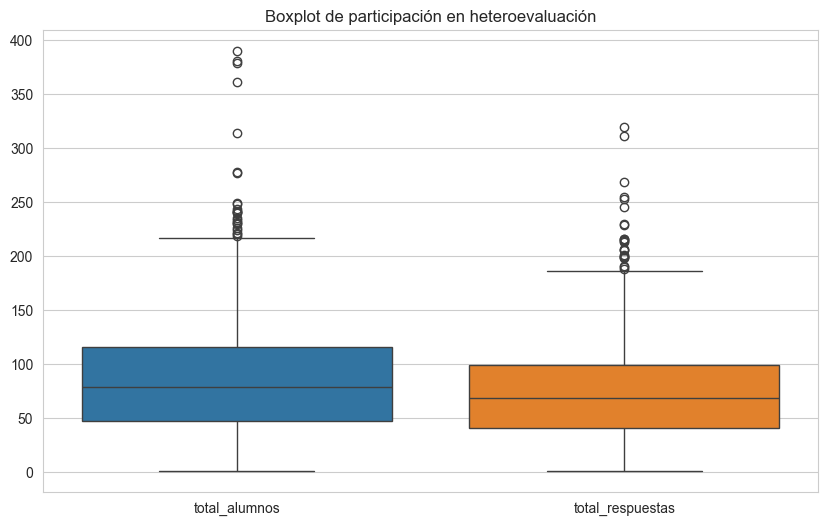

In [310]:
vars_otras_variables = ['total_alumnos', 'total_respuestas']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[vars_otras_variables])
plt.title('Boxplot de participación en heteroevaluación')
plt.show()

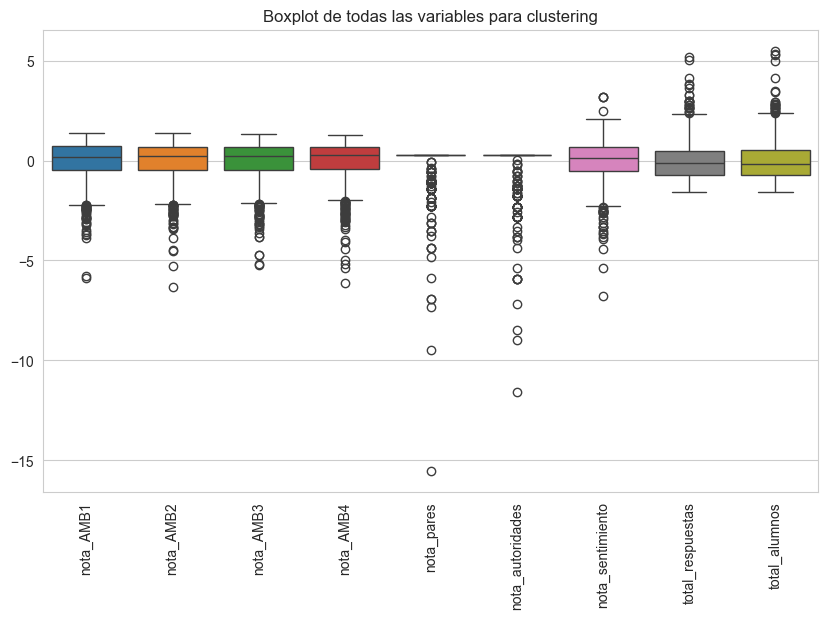

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled[vars_clustering])
plt.xticks(rotation=90)
plt.title('Boxplot de todas las variables para clustering')
plt.show()

**Análisis de correlación**

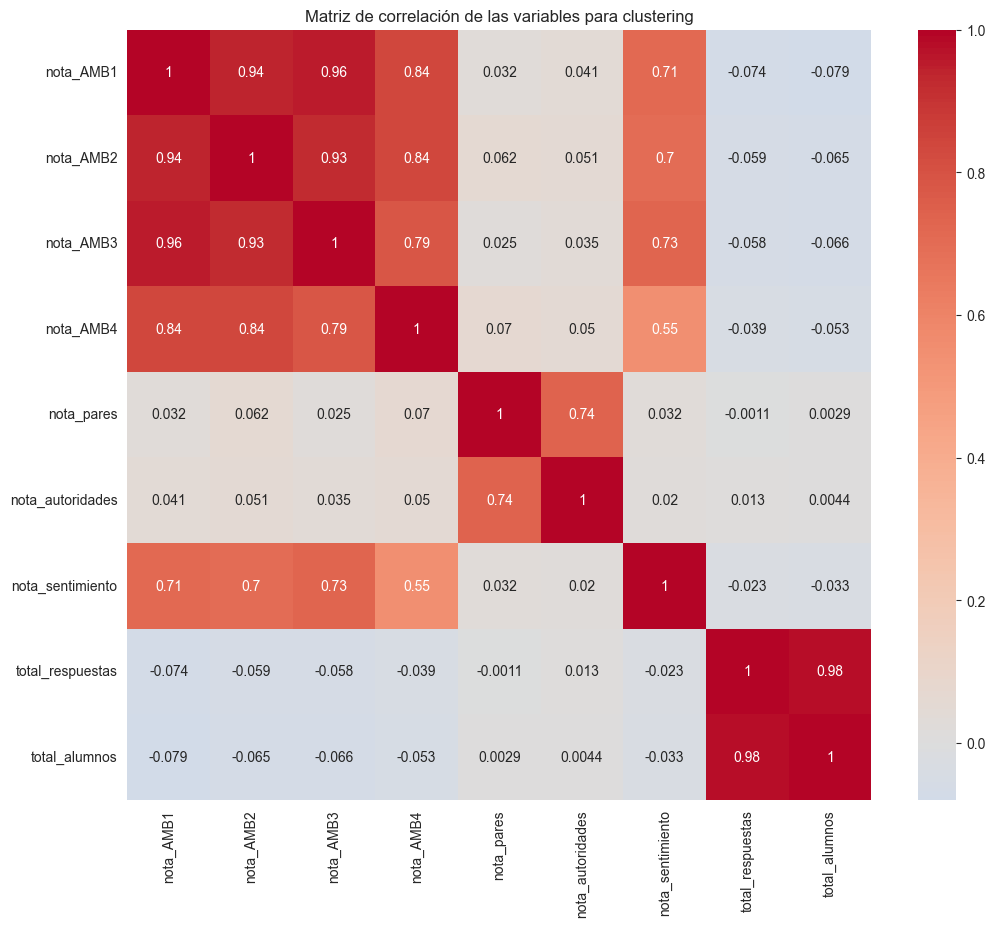

In [312]:
vars_num = df_final.select_dtypes(include='number').columns

corr = df_final[vars_clustering].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title('Matriz de correlación de las variables para clustering')
plt.show()

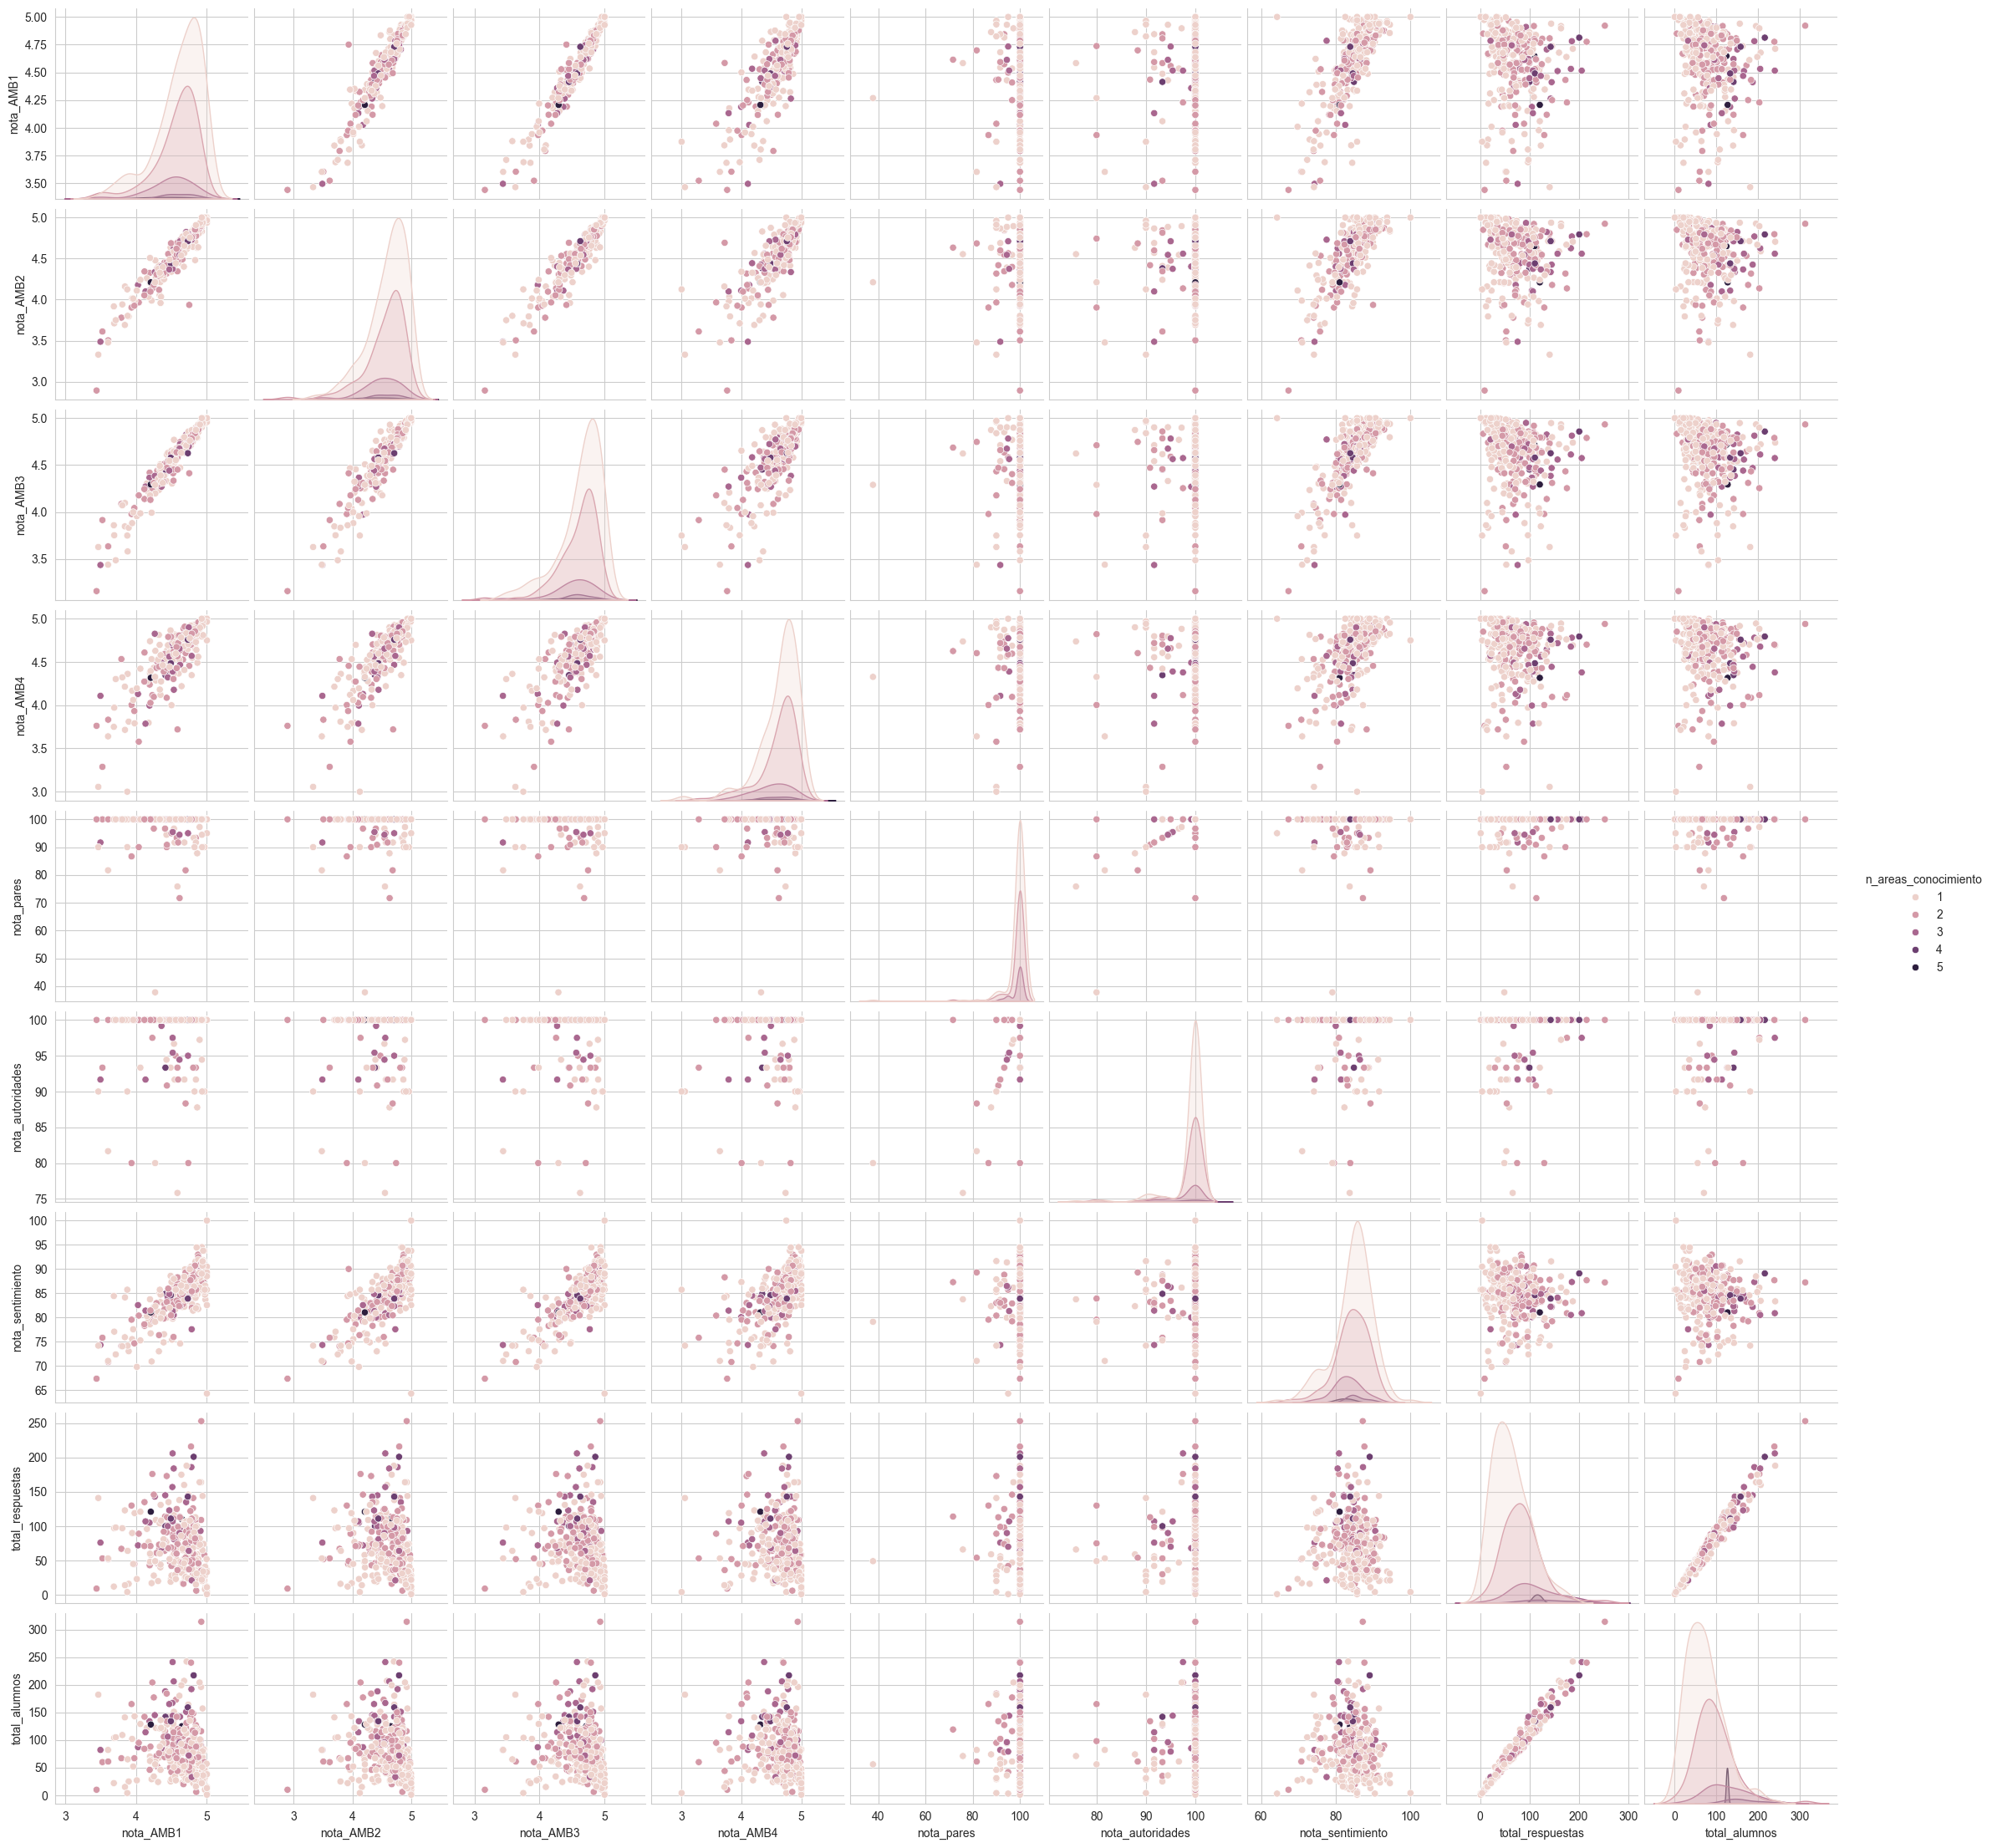

In [313]:
sns.pairplot(
    df_final[vars_clustering + ['n_areas_conocimiento']].sample(300),
    diag_kind='kde',
    hue='n_areas_conocimiento'
)

## Aplicación del modelo de clusterización K-Means

### Identificación del número óptimo de clusters

Método del codo:

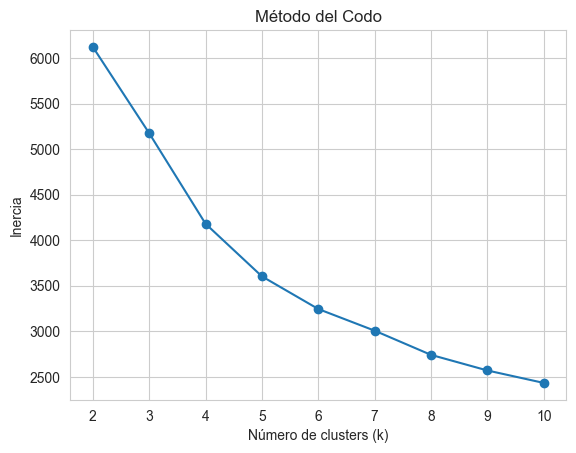

In [314]:
df_clustering = df_scaled[vars_clustering]     #dataset final con los datos numéricos normalizados para el clustering

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

Coeficiente de la Silueta:

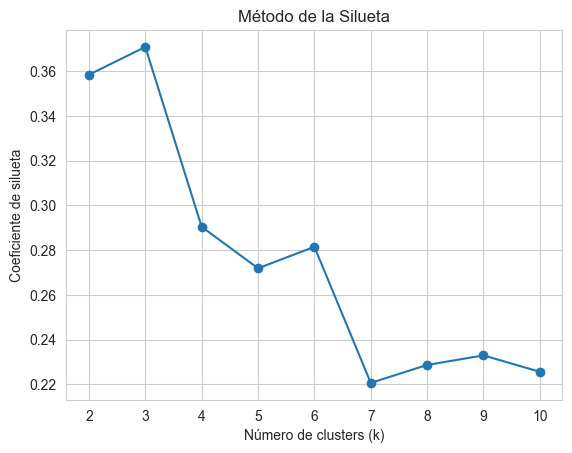

In [315]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
    labels = kmeans.fit_predict(df_clustering)
    score = silhouette_score(df_clustering, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la Silueta')
plt.show()


### Reducción de dimensionalidad (PCA)

In [316]:
df_pca = df_scaled[vars_clustering]

pca = PCA()
X_pca = pca.fit_transform(df_pca)


In [317]:
var_exp = pd.DataFrame({
    'Componente': range(1, len(vars_clustering) + 1),
    'Varianza explicada': pca.explained_variance_ratio_,
    'Varianza acumulada': pca.explained_variance_ratio_.cumsum()
})

var_exp

,Componente,Varianza explicada,Varianza acumulada
0,1,0.470740,0.470740
1,2,0.218924,0.689664
2,3,0.192380,0.882043
3,4,0.052576,0.934619
4,5,0.029587,0.964206
5,6,0.021936,0.986142
6,7,0.007675,0.993817
7,8,0.004215,0.998032
8,9,0.001968,1.000000


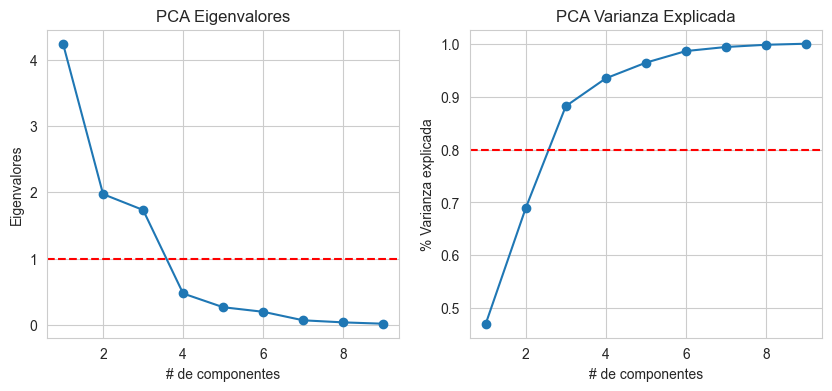

In [318]:
pca = PCA(n_components=len(df_pca.columns)).fit(df_pca)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,len(df_pca.columns)+1), pca.explained_variance_, '-o')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel("Eigenvalores")
plt.xlabel("# de componentes")
plt.title("PCA Eigenvalores")

plt.subplot(1,2,2)
plt.plot(range(1,len(df_pca.columns)+1), pca.explained_variance_ratio_.cumsum(), '-o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.ylabel("% Varianza explicada")
plt.xlabel("# de componentes")
plt.title("PCA Varianza Explicada")
plt.show()

Se seleccionan 3 componentes debido a que tienen un valor propio igual a 1, explicando aproximadadaente el 87% de la varianza. Por otro lado, seleccionar 2 componentes explicaría menos del 75% de la varianza total de los datos

In [319]:
loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=[f'PC{i+1}' for i in range(3)],
    index=vars_clustering
)

loadings

,PC1,PC2,PC3
nota_AMB1,0.473304,0.021392,-0.033027
nota_AMB2,0.468678,0.032581,-0.016298
nota_AMB3,0.466591,0.030360,-0.039512
nota_AMB4,0.426623,0.037821,-0.005362
nota_pares,0.038336,0.055830,0.703655
nota_autoridades,0.035864,0.061477,0.703093
nota_sentimiento,0.384407,0.045256,-0.037285
total_respuestas,-0.052786,0.703039,-0.055049
total_alumnos,-0.057439,0.702083,-0.056234


Aplicación de K-Means sobre los componentes principales

In [320]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_pca)

df_pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2', 'PC3'])

#K-Means sobre los datos con reducción de dimensionalidad
kmeans_pca = KMeans(n_clusters=3, init="k-means++", random_state=0)
labels_pca = kmeans_pca.fit_predict(df_pc_transformation)

df_final['cluster_pca'] = labels_pca
df_final

,docente_id_anon,nota_AMB1,nota_AMB2,nota_AMB3,nota_AMB4,nota_autoridades,nota_pares,nota_sentimiento,total_alumnos,total_respuestas,...,niveles_docente,dedicacion,modalidad,horas_formacion,horas_ADOC,horas_GEST,horas_INVE,horas_VINC,tiene_coevaluacion,cluster_pca
0,003847d92f,4.774500,4.624000,4.743333,4.829000,100.0000,100.0000,89.610390,87,65,...,Intermedio,Tiempo completo,Titular,0,30,0,10,0,1,0
1,01b18ea6b5,4.620000,4.340000,4.640000,4.700000,100.0000,100.0000,84.920635,28,25,...,Inferior,Medio tiempo,No titular,26,4,0,0,0,1,0
2,01e18b2e76,5.000000,4.965000,5.000000,4.965000,100.0000,100.0000,88.501742,38,33,...,Intermedio,Tiempo completo,Titular,0,14,2,22,2,1,0
3,01e5ecfd0a,4.613125,4.545000,4.675000,4.653750,94.4444,94.4444,86.479592,96,90,...,Intermedio + Superior,Tiempo completo,Titular,0,25,10,5,0,1,0
4,02248cd4fa,4.457500,4.404000,4.536667,4.506000,100.0000,100.0000,84.630542,142,135,...,Inferior + Intermedio,Tiempo completo,No titular,6,26,0,14,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,fdb88fedc7,4.730000,4.733500,4.732000,4.760000,100.0000,100.0000,87.779690,156,141,...,Inferior + Intermedio + Superior,Por horas,No definido,10,26,10,1,3,1,1
967,fe30504a5a,4.488000,4.531500,4.494000,4.570000,100.0000,100.0000,80.451128,138,132,...,Intermedio + Superior,Tiempo completo,No titular,0,23,2,12,3,1,1
968,fe849c36a8,4.125000,4.292500,4.073333,4.547500,100.0000,100.0000,80.851064,70,65,...,Inferior,Tiempo parcial,No titular,0,12,0,0,0,1,2
969,fec860fd22,4.796944,4.809722,4.814815,4.847778,100.0000,100.0000,85.403727,113,87,...,Intermedio,Medio tiempo,No titular,0,20,0,0,0,1,0


In [321]:
df_final.to_csv('Salidas/resultado_cluster.csv', sep=";")

In [322]:
df_final['cluster_pca'].value_counts()

cluster_pca
0    516
1    255
2    200
Name: count, dtype: int64

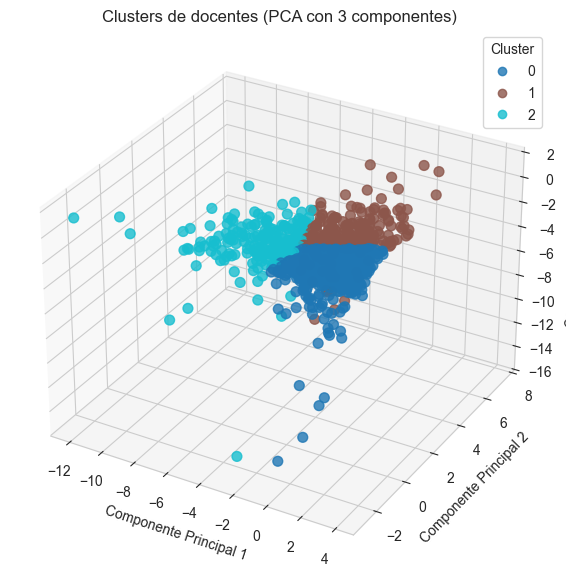

In [323]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pc_transformation['PC1'],
    df_pc_transformation['PC2'],
    df_pc_transformation['PC3'],
    c=df_final['cluster_pca'],
    cmap='tab10',
    s=50,
    alpha=0.8
)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clusters de docentes (PCA con 3 componentes)')

legend = ax.legend(
    *scatter.legend_elements(),
    title="Cluster"
)

plt.show()

## Interpretación de los clusters

In [324]:
perfil_clusters = (
    df_final
    .groupby('cluster_pca')[vars_clustering]
    .agg(['mean', 'std', 'median'])
    .round(2)
)

perfil_clusters.T

cluster_pca                   0       1       2
nota_AMB1        mean      4.74    4.60    4.12
                 std       0.15    0.16    0.27
                 median    4.75    4.59    4.18
nota_AMB2        mean      4.72    4.60    4.09
                 std       0.17    0.18    0.30
                 median    4.73    4.60    4.16
nota_AMB3        mean      4.76    4.63    4.14
                 std       0.15    0.16    0.29
                 median    4.77    4.63    4.22
nota_AMB4        mean      4.76    4.65    4.22
                 std       0.17    0.18    0.34
                 median    4.79    4.68    4.30
nota_pares       mean     99.03   98.91   98.87
                 std       3.71    3.17    5.23
                 median  100.00  100.00  100.00
nota_autoridades mean     99.01   99.31   99.12
                 std       3.67    2.23    3.13
                 median  100.00  100.00  100.00
nota_sentimiento mean     86.20   84.51   77.92
                 std       3.78    2.88    5.05
                 median   86.17   84.64   79.10
total_respuestas mean     50.49  130.64   69.44
                 std      25.24   41.07   37.76
                 median   50.00  120.00   67.00
total_alumnos    mean     57.95  151.57   80.91
                 std      28.66   50.30   43.08
                 median   57.50  138.00   78.00

In [325]:
perfil_clusters.T.to_csv('Salidas/estadisticas_cluster.csv', sep=';')

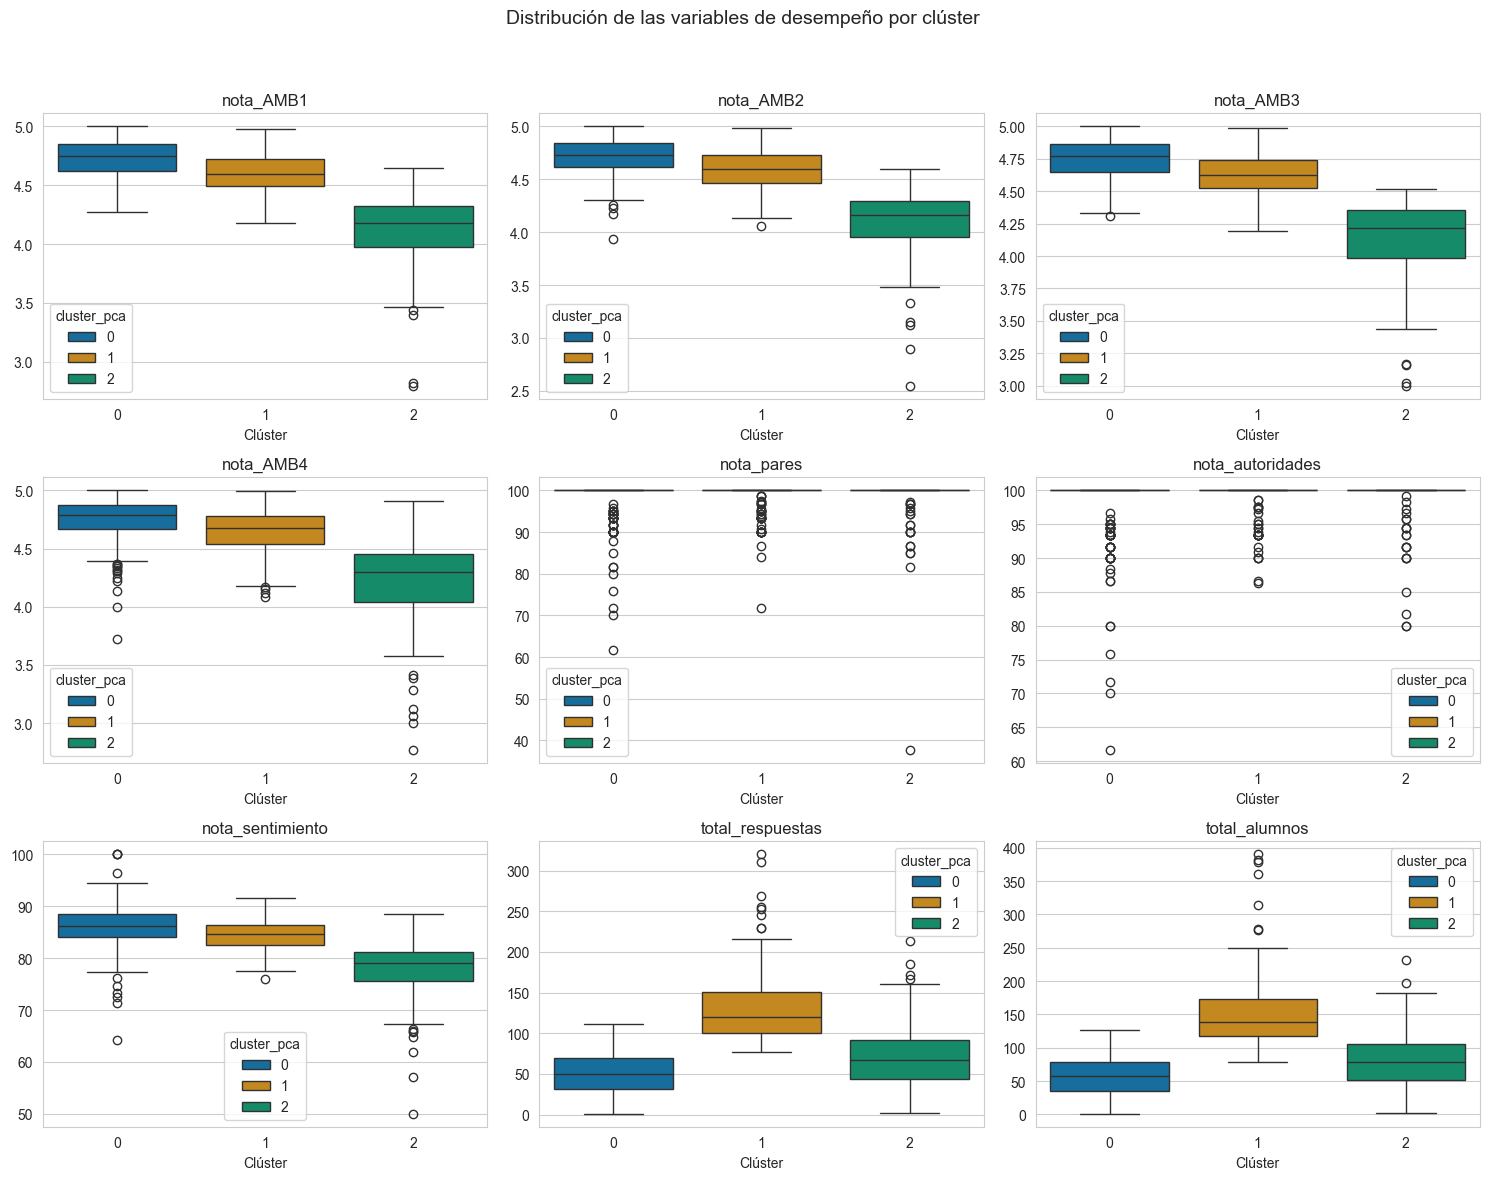

In [326]:
# Gráficos de barras de las variables del clustering
n_vars = len(vars_clustering)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(vars_clustering):
    sns.boxplot(
        data=df_final,
        x='cluster_pca',
        y=var,
        ax=axes[i],
        hue='cluster_pca',
        palette='colorblind'
    )
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel('Clúster')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    'Distribución de las variables de desempeño por clúster ',
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

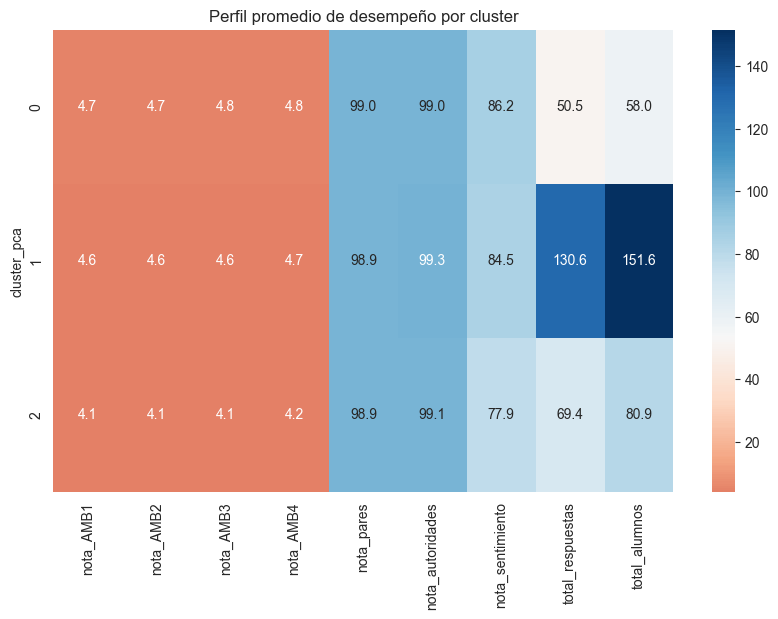

In [327]:
#Mapa de calor de las variables del clustering
media_clusters = (
    df_final
    .groupby('cluster_pca')[vars_clustering]
    .mean()
    .round(2)
)

plt.figure(figsize=(10,6))
sns.heatmap(
    media_clusters,
    annot=True,
    cmap='RdBu',
    fmt=".1f",
    center=media_clusters.mean().mean()
)
plt.title('Perfil promedio de desempeño por cluster')
plt.show()

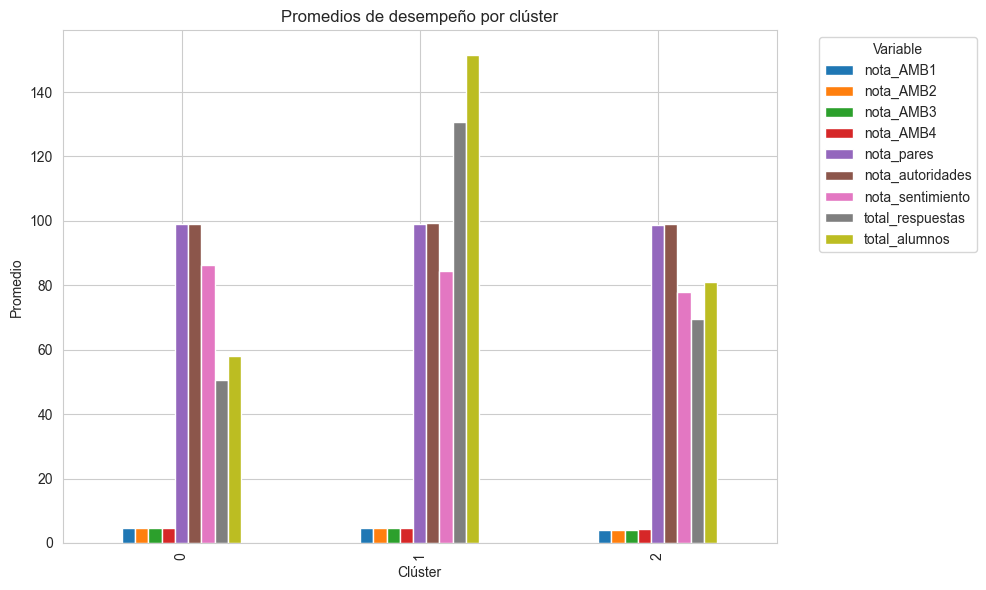

In [328]:
# Promedios por clúster
promedios_cluster = (
    df_final
    .groupby('cluster_pca')[vars_clustering]
    .mean()
)

# Gráfico
promedios_cluster.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.title('Promedios de desempeño por clúster')
plt.xlabel('Clúster')
plt.ylabel('Promedio')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


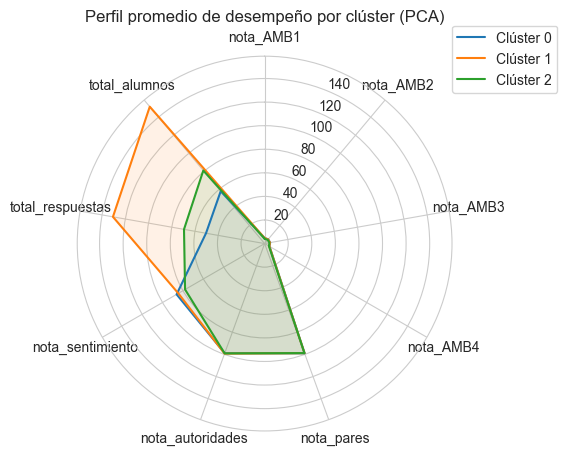

In [329]:
# Gráfico de radar con las variables del clustering
radar_data = promedios_cluster

labels = radar_data.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

for cluster in radar_data.index:
    values = radar_data.loc[cluster].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Clúster {cluster}')
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Perfil promedio de desempeño por clúster (PCA)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


**Análisis del contexto**

In [330]:
vars_contexto_num = ['n_nrc', 'n_areas_conocimiento', 'horas_formacion', 'horas_ADOC', 'horas_GEST', 'horas_INVE', 'horas_VINC']

vars_contexto_cat = [ 'dedicacion', 'modalidad', 'niveles_docente']

In [331]:
perfil_contexto_num = (
    df_final
    .groupby('cluster_pca')[vars_contexto_num]
    .mean()
    .round(2)
)

perfil_contexto_num.T

cluster_pca,0,1,2
n_nrc,3.34,6.22,3.73
n_areas_conocimiento,1.37,2.00,1.56
horas_formacion,4.41,4.38,4.71
horas_ADOC,18.03,26.10,20.07
horas_GEST,3.88,3.85,4.53
horas_INVE,3.69,3.51,3.57
horas_VINC,1.18,1.73,1.55


In [332]:
perfil_contexto_num.to_csv('Salidas/estadistica_contexto_cluster.csv', sep=';')

In [333]:
perfil_contexto_num = (
    df_final
    .groupby('cluster_pca')[vars_contexto_num]
    .agg(['mean', 'std', 'median'])
    .round(2)
)

perfil_contexto_num.T

cluster_pca                      0      1      2
n_nrc                mean     3.34   6.22   3.73
                     std      2.13   3.41   2.32
                     median   3.00   5.00   3.00
n_areas_conocimiento mean     1.37   2.00   1.56
                     std      0.57   0.98   0.80
                     median   1.00   2.00   1.00
horas_formacion      mean     4.41   4.38   4.71
                     std      9.05   8.60   8.90
                     median   0.00   0.00   0.00
horas_ADOC           mean    18.03  26.10  20.07
                     std      8.78   7.32   9.50
                     median  17.00  26.00  20.00
horas_GEST           mean     3.88   3.85   4.53
                     std      6.98   4.43   7.10
                     median   0.00   3.00   0.00
horas_INVE           mean     3.69   3.51   3.57
                     std      6.31   5.60   5.68
                     median   0.00   0.00   0.00
horas_VINC           mean     1.18   1.73   1.55
                     std      3.49   2.56   3.51
                     median   0.00   0.00   0.00

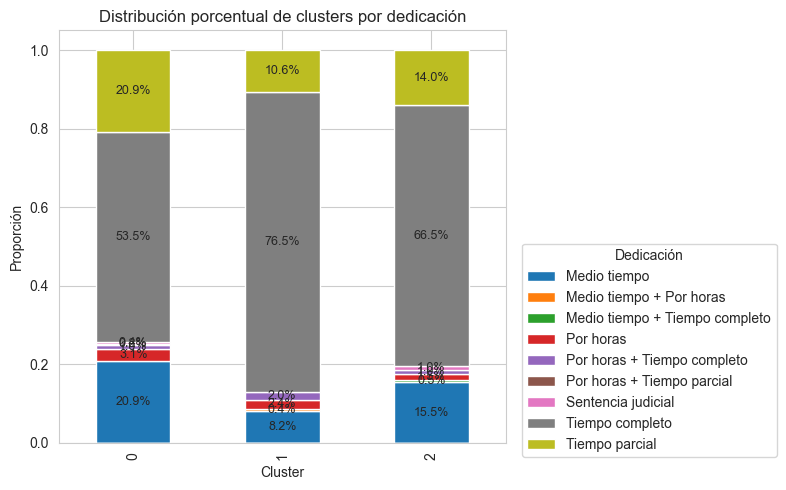

In [334]:
conteo_dedicacion = pd.crosstab(
    df_final['cluster_pca'],
    df_final['dedicacion'],
    #normalize='index'
).round(2)

#Porcentajes por cluster
dedicacion_pct = conteo_dedicacion.div(conteo_dedicacion.sum(axis=1), axis=0)

#Gráfico de barras apiladas
ax = dedicacion_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.title('Distribución porcentual de clusters por dedicación')
plt.legend(title='Dedicación', loc='best', bbox_to_anchor=(1.02, 0.5))

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v*100:.1f}%' if v > 0 else '' for v in container.datavalues],
        label_type='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [335]:
pd.crosstab(
    df_final['cluster_pca'],
    df_final['modalidad'],
    #normalize='index'
).round(2).T

cluster_pca,0,1,2
modalidad,,,
No definido,4,1,0
No titular,297,162,89
Titular,215,92,111


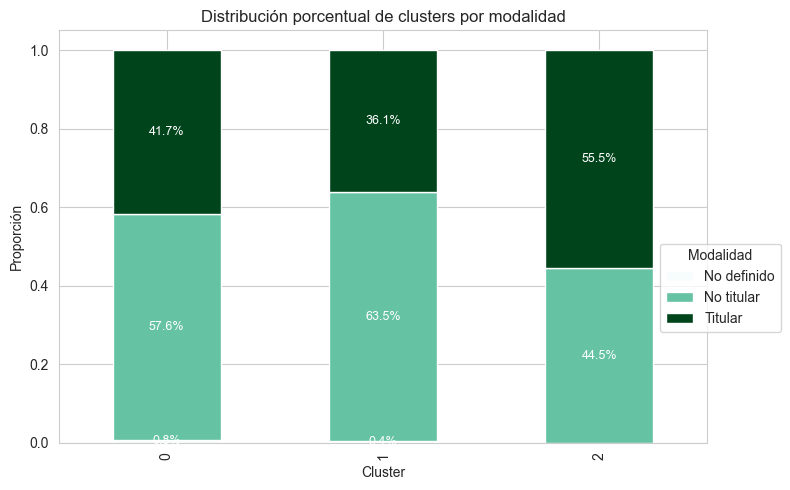

In [336]:
conteo_modalidad = pd.crosstab(
    df_final['cluster_pca'],
    df_final['modalidad'],
    #normalize='index'
).round(2)

#Porcentajes por cluster
modalidad_pct = conteo_modalidad.div(conteo_modalidad.sum(axis=1), axis=0)

ax = modalidad_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='BuGn'
)

plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.title('Distribución porcentual de clusters por modalidad')
plt.legend(title='Modalidad', loc='upper center', bbox_to_anchor=(1.02, 0.5))

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v*100:.1f}%' if v > 0 else '' for v in container.datavalues],
        label_type='center',
        fontsize=9,
        color = 'white'
    )

plt.tight_layout()
plt.show()

In [337]:
pd.crosstab(
    df_final['cluster_pca'],
    df_final['niveles_docente'],
   # normalize='index'
).round(2).T

cluster_pca,0,1,2
niveles_docente,,,
Inferior,72,27,22
Inferior + Intermedio,67,72,41
Inferior + Intermedio + No definido,1,0,0
Inferior + Intermedio + Superior,31,56,18
Inferior + No definido,1,0,0
Inferior + Superior,30,22,14
Intermedio,148,26,64
Intermedio + No definido,5,0,0
Intermedio + No definido + Superior,1,0,0


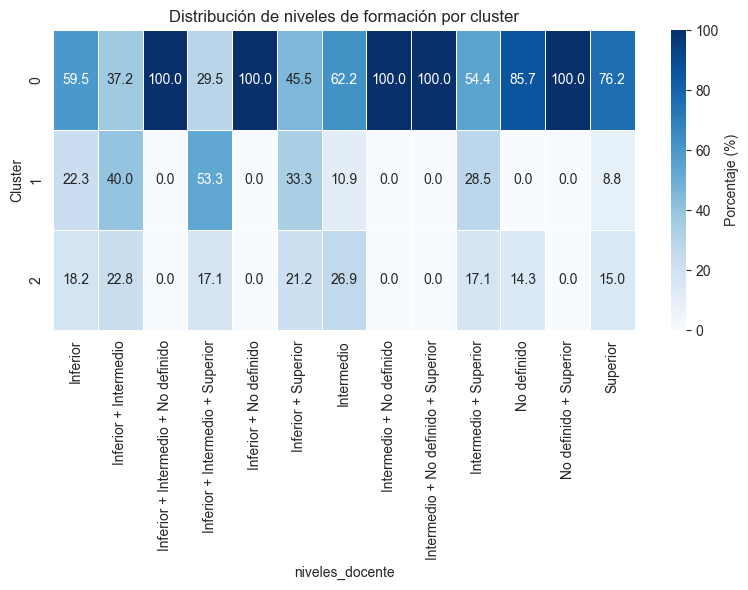

In [338]:
conteo_niveles = pd.crosstab(
    df_final['cluster_pca'],
    df_final['niveles_docente'],
    #normalize='index'
).round(2)


niveles_pct = conteo_niveles.div(conteo_niveles.sum(axis=0), axis=1) * 100

plt.figure(figsize=(8, 6))

sns.heatmap(
    niveles_pct,
    annot=True,              
    fmt='.1f',                
    cmap='Blues',            
    linewidths=0.5,
    cbar_kws={'label': 'Porcentaje (%)'}
)

plt.ylabel('Cluster')
plt.title('Distribución de niveles de formación por cluster')

plt.tight_layout()
plt.show()